In [18]:
import numpy as np
import pandas as pd
import datetime
import seaborn as sns
from matplotlib import lines
import matplotlib.pyplot as plt
from matplotlib.gridspec import GridSpec
import warnings
warnings.filterwarnings('ignore')

In [19]:
listNames = ['Khulan','Adrian','Mathilde','Virgil','FannyM','Margaux','JL','Hélène','Luca','Brice','ThiMai','Ani','Romain','StephB']
_type=['Grasshopper', 'Hybrid', 'Plugin']
niv=['No experience','Novice','Limited','Basic','Advanced','Expert']

In [20]:
def context_reorder(data, choice):
    context_grasshopper = data[(data["Object"]>1.1) & (data["Object"]<2)]
    context_hybrid = data[(data["Object"]>2.1) & (data["Object"]<3)]
    context_plugin = data[(data["Object"]>3.1) & (data["Object"]<4)]
    order1=context_grasshopper.index[0]
    order2=context_hybrid.index[0]
    order3=context_plugin.index[0]
    _order=[x for _, x in sorted(zip([order1, order2, order3], [1, 2, 3]))]
    if choice==0:
        return [context_grasshopper,context_hybrid,context_plugin], ['Grasshopper','Hybrid','Plugin'], _order
    elif choice==1:
        return context_grasshopper,'Grasshopper'
    elif choice==2:
        return context_hybrid,'Hybrid'
    elif choice==3:
        return context_plugin,'Plugin'
def sub_selection(_context, choice):
    facade_choice=choice
    if facade_choice==0:
        return _context
    return _context[_context["Object"] % 1 - (choice / 10) < 0.1]
def diff_analysis(_context):
    Diff1=(_context.diff(1, 0) != 0)
    Diff1.iloc[0]=False
    Diff1['Time']=_context['Time']
    # display(Diff1)
    return Diff1
def timeconvert(time):
    hours=int(time / 3600)
    minutes=int((time - hours * 3600) / 60)
    seconds=int(time - hours * 3600 - minutes * 60)
    return datetime.time(hours,minutes,seconds)
def timetosec(Time):
    return (Time.second+Time.minute*60+Time.hour*3600)/60
def splitpr(df,imp):
    prof1=pd.DataFrame()
    prof2=pd.DataFrame()
    prof3=pd.DataFrame()
    prf = profile.loc[df.index]
    score=prf[imp]
    i=0
    for x in score:     
        if int(x)==0:
            prof1=prof1.append(df.iloc[i])
        if int(x)==1:
            prof2=prof2.append(df.iloc[i])
        if int(x)==2:
            prof3=prof3.append(df.iloc[i])
        i+=1
    return prof1.T,prof2.T,prof3.T
def bplot(it,ax1,col,cat):
    _it=it.filter(col)
    pr1,pr2,pr3=splitpr(_it,cat)
    ax1.boxplot(_it,labels=_it.columns)
    locs = ax1.get_xticks() 
    for x in pr1:
        ax1.hlines(pr1.T.loc[x],xmin=2*locs/3,xmax=4*locs/3,color='blue',label=x,alpha=1,lw=1)
    for x in pr2:
        ax1.hlines(pr2.T.loc[x],xmin=2*locs/3,xmax=4*locs/3,color='green',label=x,alpha=1,lw=1)
    for x in pr3:
        ax1.hlines(pr3.T.loc[x],xmin=2*locs/3,xmax=4*locs/3,color='red',label=x,alpha=1,lw=1)
    return 1
def GraphEnq(ax,a,resGh):
    if a==None:
        resGh1=resGh
    else:
        resGh1=resGh[resGh['Order']==a]
    _color2=resGh1['Level'].map(lambda x:_color[int(x)])
    resGh1['Level']=resGh1['Level'].map(lambda x:niv[int(x)])
    _color3=_color2.drop_duplicates()
    ax.set_autoscaley_on(False)
    ax.set_ybound(0,11)
    r=sns.pointplot(x='variable',y='value',data=resGh1[resGh1['Survey']=='A'],hue='Level',ci='sd',dodge=0.3,palette=_color3.to_list(),markers='x',ax=ax,scale=1,linestyles='--')
    # testc=r.get_children()
    line=r.get_lines()
    i=0
    for item in line[:]:
        item.set_alpha(0.6)
        item.set_linewidth(1.5)
        i+=1
        item.set_zorder(1)
    # testc[0].set_alpha(0.5)
    r=sns.pointplot(x='variable',y='value',data=resGh1[resGh1['Survey']=='B'],hue='Level',ci='sd',dodge=0.3,palette=_color3.to_list(),markers='o',ax=ax,scale=1)
    line=r.get_lines()
    # for item in line[:]:
    #     item.set_alpha(1)
    #     item.set_linewidth(2.5)
    #     item.set_zorder(3)
    ax.set_ylabel(None)
    ax.set_xlabel(None)
    if a!=None:
        ax.set_xticklabels("")
    ax.get_legend().remove()
    return
def InteractionLinePlot(_ax,resultat,order,keeplist):
    int1=resultat[resultat.index.get_level_values('Order')==order]
    _min=int1.min()
    _max=int1.max()
    _mean1=int1.mean()
    int1.drop(keeplist,axis=1,inplace=True)
    _color2=int1['Level'].map(lambda x:_color[int(x)])
    int1['Level']=int1['Level'].map(lambda x:niv[int(x)])
    _color3=_color2.drop_duplicates()
    int1=int1.melt(id_vars=['Level'])
    sns.pointplot(x=int1['variable'],y=int1['value'],data=int1,hue=int1['Level'],palette=_color3.to_list(),ax=_ax,ci='sd',dodge=0.2)
    _ax.set_title('Interaction '+str(order+1),loc='left',pad=3)
    # _ax.set_ymargin(0.2)
    _ax.set_ylabel(None)
    _ax.set_xlabel(None)
    _ax.tick_params(axis='y',pad=-1)
    _ax.legend(loc='upper right',title='Level')
    _ax.set_xticklabels("")
    return int1
def bxplt(ax,c,r,keeplist):
    r=r[[keeplist[c],'Level']]
    r=r.reset_index('Order',drop=False)
    r2=r.copy()
    _color=sns.mpl_palette('RdYlBu_r',3)
    _color.append('gray')
    r2['Order']=3
    r=r.append(r2)
    sns.boxplot(ax=ax,y='Order',x=keeplist[c],data=r,orient='h',hue='Order',dodge=False,palette=_color)
    sns.swarmplot(ax=ax,y='Order',x=keeplist[c],data=r,orient='h',hue='Level',palette='Paired',dodge=True,s=10,marker='x',linewidth=3)
    ax.set_title(keeplist[c],loc='center',pad=3)
    ax.get_legend().remove()
    ax.set_ylabel(None)
    ax.set_yticklabels(['Interaction 1','Interaction 2','Interaction 3','Average'])
    return
def timelevelplot(df,dflevel,l,ax,o):
        if l==None:
            df0=df.droplevel('Order')
            lvllist=dflevel
        else:
            df0=df.xs(l,level='Order')
            lvllist=dflevel[l]
        for lvl in lvllist:
            df01=df0.xs(lvl,level='Level').melt().applymap(lambda x:int(x))
            sns.regplot(x='variable',y='value',data=df01,color=_color[lvl],ax=ax,order=o,x_estimator=np.mean,scatter=False,ci=None)
        ax.set_ylabel(None)
        ax.set_xticklabels("")
        ax.set_xlabel(None)
        ax.tick_params(axis='y',pad=-1)
        return

In [21]:
enquete=pd.read_excel("Enquete.xlsx")
enquete['Nom']=listNames
intro=enquete.iloc[:,[4,7,10,16]]
niveau=enquete.iloc[:,[4,21,24,27,30,33,36,39,42]]
detail=enquete.iloc[:,[4,45,48]]
ResInt1=enquete.iloc[:,[4,51,54,57,60,63]]
ResInt1.set_index('Nom',inplace=True)
ResInt2=enquete.iloc[:,[4,69,72,75,78,81]]
ResInt2.set_index('Nom',inplace=True)
ResInt3=enquete.iloc[:,[4,87,90,93,96,99]]
ResInt3.set_index('Nom',inplace=True)
ResInt1post=enquete.iloc[:,[4,105,108,111,114,117]]
ResInt1post.set_index('Nom',inplace=True)
ResInt2post=enquete.iloc[:,[4,123,126,129,132,135]]
ResInt2post.set_index('Nom',inplace=True)
ResInt3post=enquete.iloc[:,[4,141,144,147,150,153]]
ResInt3post.set_index('Nom',inplace=True)
col=ResInt1.columns
ResInt2.columns=col
ResInt3.columns=col
ResInt1post.columns=col
ResInt2post.columns=col
ResInt3post.columns=col
ResInt=[ResInt1,ResInt2,ResInt3]
ResIntpost=[ResInt1post,ResInt2post,ResInt3post]
# ResInt=ResIntpost
def convertNiveau(n):
        niv=["Aucune expérience","Novice","Limité","Habitué","Avancé","Expert"]
        return niv.index(n)

niveau.set_index('Nom',inplace=True)
niveau=niveau.applymap(convertNiveau)
niveau['Tot']=niveau[['Rhino','Grasshopper']].mean(axis=1).round(0).convert_dtypes(convert_integer=True)
niveau['Tot'].quantile(q=0.5)    
def profile(n):
    low=n.quantile(q=0.33)
    high=n.quantile(q=0.66)
    p=[]
    for x in n:
        if x <= low:
            p.append(0)
        elif low<x<=high:
            p.append(1)
        elif high<x:
            p.append(2)
    return p
    

profile=niveau.apply(profile,axis=0)
# display(ResInt3post)

In [22]:
iterations_df=pd.DataFrame()
time_iterations_df=pd.DataFrame()
time_phases_df=pd.DataFrame()
time_unique_df=pd.DataFrame()
phase_df=pd.DataFrame()
unique_df=pd.DataFrame()
ResEnquete=pd.DataFrame()
for name in listNames:
    path = name + '/' + name +'.csv'
    test = pd.read_csv(path,sep=';')
    test["Time"] = pd.to_datetime(test["Time"],format = '%H:%M:%S:%f')
    Implementations,Index,Order = context_reorder(test, 0)
    diff_df_list=[]
    phase=[]
    Res=[x for _, x in sorted(zip(Order,ResInt))]
    ResPost=[x for _, x in sorted(zip(Order,ResIntpost))]
    unique=[]
    timeiterations=pd.DataFrame()
    timephases=pd.DataFrame()
    timeUnique=pd.DataFrame()
    iteration=[]
    _time=[]
    i=0
    for implementation in Implementations:
        timeunique=pd.DataFrame()
        implementation=sub_selection(implementation, 0)
        last=implementation['Time'].iloc[-1]
        first=implementation['Time'].iloc[0]
        deltatime = last-first
        _time.append(deltatime.seconds)
        implementation = implementation.drop(['Object'],axis=1)
        diff_df_list.append(diff_analysis(implementation))
        imp=implementation.copy()
        starttime=imp['Time'].iloc[0]
        imp['Time']=imp['Time']-starttime
        imp['Time']=imp['Time'].map(lambda x:x.seconds)
        starttime=imp['Time'].iloc[0]
        endtime=imp['Time'].iloc[-1]
        timeintervals=11
        timerange=round((endtime/timeintervals),2)
        for j in range(1,timeintervals):
            imp2=imp[(imp['Time']>starttime)&(imp['Time']<(starttime+timerange*(j)))]
            imp2=imp2.nunique()
            imp1=imp[(imp['Time']>starttime)&(imp['Time']<(starttime+timerange*(j+1)))].nunique()
            imp1=imp1-imp2
            timeunique=timeunique.append(imp1.drop(['Time']),ignore_index=True)
        
        timeunique[Index[i]]=timeunique.sum(axis=1).map(lambda x:int(x))
        timeunique=timeunique[Index[i]]
        timeUnique=timeUnique.append(timeunique)
        
        _unique=implementation.drop(['Time'],axis=1).nunique(axis=0)
        unique.append(_unique)
        
        i+=1
    i=0
    
    for diff_df in diff_df_list:
        
        diff_df['Time']-=diff_df['Time'].iloc[0]
        starttime=diff_df['Time'].iloc[0]
        endtime=diff_df['Time'].iloc[-1]
        timeintervals=11
        # display(diff)
        timerange=(endtime-starttime)/timeintervals
        diff_df.set_index('Time', inplace=True)
        # display(diff)
        timeit=[]
        st=diff_df.resample(timerange, closed='left').sum()
        # display(st)
        st[Index[i]]=st.sum(axis=1)
        st=st.reset_index()
        st=st[Index[i]]
        st.iloc[-2]=st.iloc[-2]+st.iloc[-1]
        st=st.iloc[:-1]
        timeiterations=timeiterations.append(st)
        # diff['Time']=_time[i]
        l=((diff_df * 1).diff(1, 0) == 1)
        st=l.resample(timerange,closed='left').sum()
        st[Index[i]]=st.sum(axis=1)
        st=st.reset_index()
        st=st[Index[i]]
        st.iloc[-2]=st.iloc[-2]+st.iloc[-1]
        st=st.iloc[:-1]
        timephases=timephases.append(st)
        # display(l)
        l=l.sum()
        l['Time']=_time[i]
        phase.append(l)
        t=diff_df.sum()
        t["Total Iterations"]=t.sum()
        t['Time']=_time[i]
        
        t["Iterations / Minute"]=t["Total Iterations"]/(t['Time']/60)
        i=i+1
        # display(t)
        iteration.append(t)   
    
    iterations = pd.DataFrame(iteration,index=Index)
    totit = iterations.sum()
    avit = iterations.mean()
    stdit = iterations.std()
    iteration.append(totit)
    iteration.append(avit)
    iteration.append(stdit)
    phases = pd.DataFrame(phase,index=Index)
    totphase = phases.sum()
    avphase = phases.mean()
    stdphase = phases.std()
    phase.append(totphase)
    phase.append(avphase)
    phase.append(stdphase)
    uniquevals = pd.DataFrame(unique,index=Index)
    totunique = uniquevals.sum()
    avunique = uniquevals.mean()
    stdunique = uniquevals.std()
    unique.append(totunique)
    unique.append(avunique)
    unique.append(stdunique)
    Name = [name]
    Index2 = pd.MultiIndex.from_product([Name,Index],names=["Name","Type"])
    indexframe2=Index2.to_frame()
    Index.append("Tot")
    Index.append("Average")
    Index.append("Standard Deviation")
    Index = pd.MultiIndex.from_product([Name,Index],names=["Name","Type"])
    indexframe=Index.to_frame()
    prf=""
    for x in niveau.loc[name].values:
        prf=prf+str(int(x)).strip()
    order=[]
    for item in range(1,7):
        try:
            order.append(int(Order.index(item)))
        except:
            order.append("-")
            
    indexframe['Order']=order
    indexframe2['Order']=order[:-3]
    indexframe2['Level']=prf
    indexframe2=indexframe2[['Name','Level','Order','Type']]
    indexframe3=indexframe2.copy()
    
    Index2=pd.MultiIndex.from_frame(indexframe2)
    indexframe['Level']=prf
    indexframe=indexframe[['Name','Level','Order','Type']]
    Index=pd.MultiIndex.from_frame(indexframe)
    timeiterations=pd.DataFrame(timeiterations.values,index=Index2)
    timephases=pd.DataFrame(timephases.values,index=Index2)
    timeUnique=pd.DataFrame(timeUnique.values,index=Index2)
    
    resEnquete=pd.DataFrame([Res[0].xs(name),Res[1].xs(name),Res[2].xs(name)],index=Index2)
    resEnquete['Survey']='A'
    resEnquetepost=pd.DataFrame([ResPost[0].xs(name),ResPost[1].xs(name),ResPost[2].xs(name)],index=Index2)
    resEnquetepost['Survey']='B'
    resEnquete=resEnquete.append(resEnquetepost)
    resEnquete.set_index('Survey',append=True,inplace=True)
    iterations = pd.DataFrame(iteration,index=Index)
    unique = pd.DataFrame(unique,index=Index)
    unique['Max']=unique.max(axis=1)
    unique['Total']=unique.drop('Max',axis=1).sum(axis=1)
    unique['CV']=unique.drop(['Total','Max'],axis=1).std(axis=1)/unique.drop(['Total','Max'],axis=1).mean(axis=1)
    phases = pd.DataFrame(phase,index=Index)
    phases['Max']=phases.drop('Time',axis=1).max(axis=1)
    phases['Total']=phases.drop(['Max','Time'],axis=1).sum(axis=1)
    phases['Average']=phases.drop(['Total','Max','Time'],axis=1).mean(axis=1)
    # display(name)
    Person = {
    "Name": name,
    "Iteration":iterations,
    "Phases": phases}
    if (iterations_df.shape[0]>1):
        iterations_df = iterations_df.append(iterations)
        phase_df = phase_df.append(phases)
        unique_df = unique_df.append(unique)
        ResEnquete = ResEnquete.append(resEnquete)
        time_iterations_df=time_iterations_df.append(timeiterations)
        time_phases_df=time_phases_df.append(timephases)
        time_unique_df=time_unique_df.append(timeUnique)
    elif iterations_df.shape[0]<1 :
        iterations_df=iterations
        phase_df=phases
        ResEnquete = resEnquete
        time_iterations_df = timeiterations
        time_phases_df = timephases
        time_unique_df= timeUnique
iterations_df['Time']=iterations_df['Time'].apply(timeconvert)
phase_df['Time']=phase_df['Time'].apply(timeconvert)
ord=[1,1]
resEnq=ResEnquete
resEnq.columns=['Accessibility','Comprehension','Ease of Use','Usability','Satisfaction']
display(resEnq)
resEnq=resEnq.reset_index(['Type','Level','Order','Survey'],drop=False)
resEnq=resEnq.melt(id_vars=['Type','Level','Order','Survey'])
# display(resEnq)
# display(TimeUnique)
# display(TimeIterations)
# resEnq2=resEnq
# resEnq2['Level']=resEnq2['Level'].map(lambda x:int(x[8]))
# fig=plt.figure(figsize=(16,6))
# sns.pointplot(x='variable',y='value',data=resEnq2[resEnq['Type']=='Grasshopper'],hue='Level',ci='sd',dodge=0.15,palette='Paired');

# hyb=sns.pointplot(x='variable',y='value',data=resEnq2[resEnq['Type']=='Hybrid'],hue='Level',dodge=0.15,ci='sd',palette='Paired');
# hyb.set_title('Hybrid');
# fig=plt.figure(figsize=(24,6))
# plg=sns.pointplot(x='variable',y='value',data=resEnq2[resEnq['Type']=='Plugin'],hue='Level',dodge=0.15,ci='sd',palette='Paired');
# plg.set_title('Plugin');

Accessibility  Comprehension  \
Name   Level     Order Type        Survey                                 
Khulan 303112001 0     Grasshopper A                 9.0            9.0   
                 1     Hybrid      A                 9.0            9.0   
                 2     Plugin      A                 7.0            8.0   
                 0     Grasshopper B                 NaN            NaN   
                 1     Hybrid      B                 NaN            NaN   
...                                                  ...            ...   
StephB 404223002 0     Hybrid      A                 8.0            8.0   
                 1     Plugin      A                 7.0            8.0   
                 2     Grasshopper B                 7.0            6.0   
                 0     Hybrid      B                 9.0            9.0   
                 1     Plugin      B                 7.0            8.0   

                                           Ease of Use  Usability  \
Name   Level     Order Type        Survey                           
Khulan 303112001 0     Grasshopper A               9.0       10.0   
                 1     Hybrid      A              10.0       10.0   
                 2     Plugin      A               7.0       10.0   
                 0     Grasshopper B               NaN        NaN   
                 1     Hybrid      B               NaN        NaN   
...                                                ...        ...   
StephB 404223002 0     Hybrid      A               8.0        6.0   
                 1     Plugin      A               8.0        5.0   
                 2     Grasshopper B               7.0        5.0   
                 0     Hybrid      B               9.0        8.0   
                 1     Plugin      B               7.0        6.0   

                                           Satisfaction  
Name   Level     Order Type        Survey                
Khulan 303112001 0     Grasshopper A                8.0  
                 1     Hybrid      A                8.0  
                 2     Plugin      A                8.0  
                 0     Grasshopper B                NaN  
                 1     Hybrid      B                NaN  
...                                                 ...  
StephB 404223002 0     Hybrid      A                9.0  
                 1     Plugin      A                7.0  
                 2     Grasshopper B                7.0  
                 0     Hybrid      B                9.0  
                 1     Plugin      B                7.0  

[84 rows x 5 columns]

In [23]:
# fig=plt.figure(figsize=(22,7))
o=1
def timeplot(dflist,typelist,colorlist,lslist,ax):
    if not isinstance(dflist,list):
        dflist=[dflist]
    for df,ls in zip(dflist,lslist):
        if isinstance(typelist,list):
            for t,c in zip(typelist,colorlist):
                sns.regplot(x='variable',y='value',data=df.xs(t,level='Type').melt().applymap(lambda x:int(x)),x_estimator=np.mean,scatter=False,order=o,color=c,line_kws=dict(ls=ls),ci=68,label=t,ax=ax)
        else:
            c=colorlist[0]
            t=typelist
            sns.regplot(x='variable',y='value',data=df.xs(t,level='Type').melt().applymap(lambda x:int(x)),x_estimator=np.mean,scatter=False,order=o,color=c,line_kws=dict(ls=ls),ci=None,ax=ax)
        ax.set_xlabel(None)
        ax.set_xticklabels("")
    return
typelist= _type[:]
# display(TimeIterations)
colorlist=['b','g','r']
# ax1=fig.add_subplot()
x = list(zip(_type, colorlist))[1:3]
if not isinstance(x,list):
    x=[x]
typelist=[y for y,_ in x]
colorlist=[y for _,y in x]
lslist=['-','--','-.',':']
df=time_iterations_df
# df,v=choselevel(df,4)
# df=df.xs(2,level='Level')
# df=df.xs(0,level='Order')
# df=df.xs('Grasshopper',level='Type')
# display(df)
# display(np.asarray(df.melt().applymap(lambda x:int(x))))
# sns.regplot(x='variable',y='value',data=df.melt().applymap(lambda x:int(x)))
check1=time_iterations_df.index.get_level_values('Order').isin([0, 2])
check2= time_iterations_df.index.get_level_values('Order') == 1
timeiterationlist=[time_iterations_df, time_iterations_df.xs(0, level='Order'), time_iterations_df.xs(1, level='Order'), time_iterations_df.xs(2, level='Order')]
# timeplot(TimeIterations[1].,typelist,colorlist,lslist,ax1);

In [24]:
def tripleplot(df,clname,ax1,ax2,title,colorlist,_level,fn,_color='#bde0fe'):
    
    time=df[clname]
    time3=time
    time=time.reset_index(level=_level)
    niv=['No experience','Novice','Limited','Basic','Advanced','Expert']
    time['x']=title
    ax1.margins(y=0.1)
    r=sns.regplot(x=time[_level].map(fn),y=time[clname],ax=ax1,x_estimator=np.mean,order=2)
    
    # ax1.yaxis('image')
    testc=r.get_children()
    testc[0].set_facecolors(colorlist)
    line=r.get_lines()
    i=0
    for item in line[:-1]:
        item.set_color(colorlist[i])
        i+=1
        item.set_zorder(3)
    testc[0].set_zorder(4)
    ax1.set_xticklabels("")
    ax1.set_ylim(bottom=0)
    ax1.tick_params(axis='x',length=0)
    
    if (not ax2==None):
        violin=sns.violinplot(x=time['x'],y=time[clname],data=time,ax=ax2,positions=[2],inner='quartile',cut=0,color='#EDF6F9',alpha=0.2,zorder=1)
        scatter=sns.swarmplot(x=time['x'],y=time[clname],data=time,hue=time[_level],ax=ax2,palette=colorlist,edgecolor="grey",linewidth=0.4,dodge=True,s=7)
        ax2.get_legend().remove()
        ax2.set_xticklabels("")
        ax2.set_frame_on(False)
        ax2.grid(visible=True)
        ax2.set_ylabel(None)
        ax2.set_xlabel(None)

    ax1.set_frame_on(False)
    ax1.set_ylabel(None)
    ax1.set_xlabel(None)
    return 1
def choselevel(df,b):
    df2=df.reset_index(level='Level')
    df2['Level']=df2['Level'].map(lambda x:int(x[b]))
    levellength=df2['Level'].value_counts().sort_index()
    df2.set_index(['Level'],append=True,inplace=True)
    df2.sort_index(axis=0,level='Level',inplace=True)
    return df2,levellength

In [25]:
def etudegen(a,df,timedf,studycolumns,b,Title,y2=0.175):
    it2=df.xs(_type[a], level='Type')
    if ('Time' in it2.columns):it2['Time']=it2['Time'].apply(timetosec)
    it2,levellength = choselevel(it2,b)
    it=it2[studycolumns]

    it2=it2.drop(studycolumns,axis=1)

    col=it2.columns
    col=col.to_list()
    fig=plt.figure(figsize=(22,12),facecolor="#fefdfd")
    _Title=str(_type[a])
    fig.title=str(Title)

    gs = GridSpec(6,30,figure=fig)
    ax1=fig.add_subplot(gs[2:4,:3])
    ax3=fig.add_subplot(gs[2:4,4:7])
    ax4=fig.add_subplot(gs[2:4,8:11])
    ax9=fig.add_subplot(gs[4:,12:])
    ax5=fig.add_subplot(gs[4:,12:])
    ax2=fig.add_subplot(gs[2:4,12:],sharex=ax9)
    ax6=fig.add_subplot(gs[4:,:3])
    ax7=fig.add_subplot(gs[4:,4:7])
    ax8=fig.add_subplot(gs[4:,8:11])
    ax10=fig.add_subplot(gs[1:2,:3])
    ax11=fig.add_subplot(gs[1:2,4:7])
    ax12=fig.add_subplot(gs[1:2,8:11])
    ax13=fig.add_subplot(gs[:2,12:30])
    ax14=fig.add_subplot(gs[:1,:12])
    sns.heatmap(it2.droplevel(['Order','Level']),annot=True,ax=ax5,cbar=False,cmap="vlag",linewidth=0.5)#"YlOrBr");
    # sns.heatmap(it2.droplevel(['Order','Level']),annot=True,ax=ax9,cbar=False,cmap="vlag",linewidth=0.5)
    ax5.set_yticklabels("")
    ax5.set_ylabel(None)
    ax9.set_yticklabels("")
    ax9.set_ylabel(None)
    ax9.set_xticklabels("")
    ax9.set_xlabel(None)
    # sns.regplot(x='variable',y='value',data=TimeIterations.xs(0,level='Level').melt(),ax=ax13)
    locs=ax5.get_xticks()
    labels=ax5.get_xticklabels()
    ax2.set_xticks(locs)
    time=pd.DataFrame(it[studycolumns[0]].droplevel(['Level','Order']))
    ax9.tick_params(axis='y',tickdir='in')
    totit=pd.DataFrame(it[studycolumns[1]])
    sns.heatmap(time,ax=ax6,cbar=False,annot=True,cmap="vlag")
    sns.heatmap(totit,ax=ax7,cbar=False,annot=True,cmap="vlag",fmt="g")
    ax7.set_yticklabels("")
    ax7.set_ylabel(None)
    ax7.set_xticklabels("")
    ax7.set_xlabel(studycolumns[1])
    it_min=pd.DataFrame(it[studycolumns[2]])
    sns.heatmap(it_min,ax=ax8,cbar=False,annot=True,cmap="vlag")
    ax8.set_yticklabels("")
    ax8.set_ylabel(None)
    ax8.set_xticklabels("")
    ax8.set_xlabel(studycolumns[2])

    lplt=it2.droplevel(['Order'])
    lplt.columns=locs
    _color=sns.mpl_palette("Paired",6)#['blue','green','red']
    lplt=lplt.reset_index(level='Level',drop=False)
    _color2=lplt['Level'].map(lambda x:_color[x])
    _color3=_color2.drop_duplicates()
    niv=['No experience','Novice','Limited','Basic','Advanced','Expert']
    lplt['Level']=lplt['Level'].map(lambda x:niv[x])
    ax2lines=ax2.get_lines()
    i=0
    for line in ax2lines:
        line.set_color(_color2[i])
        line.set_linewidth(0.5)
        i+=1
    lplt=lplt.melt(id_vars='Level')
    sns.pointplot(x=lplt['variable'],y=lplt['value'],hue=lplt['Level'],palette=_color3.to_list(),data=lplt,ax=ax2,dodge=0.5)
    
    resGh=resEnq[resEnq['Type'] == _type[a - 1]]
    resGh['Level']=resGh['Level'].map(lambda x:x[b])
    GraphEnq(ax14,None,resGh)
    ax14.set_frame_on(False)
    
    v= tripleplot(it,studycolumns[0],ax10,ax1,'Time in minutes',_color3.to_list(),'Level',(lambda x:x))
    v= tripleplot(it,studycolumns[1],ax11,ax3,'Iterations',_color3.to_list(),'Level',(lambda x:x))
    v= tripleplot(it,studycolumns[2],ax12,ax4,'Iterations/Minute',_color3.to_list(),'Level',(lambda x:x))
    
    df=timedf.xs(_type[a - 1], level='Type').reset_index('Level', drop=False)
    df['Level']=df['Level'].map(lambda x:int(x[b]))
    dflevel=df['Level'].unique()
    df.set_index(['Level'],append=True,inplace=True)
    timelevelplot(df,dflevel,None,ax13,3)
    ax13.set_frame_on(False)    
    
    
    
    
    # tot=it.sum().T
    fig.suptitle(Title+": "+_Title,fontsize=20,y=0.92)

    x1=0.125
    x2=0.9#0.7051
    y1=0.361
    # y2=0.175
    t=pd.Series([0,0,0,0,0,0])
    levellength=t.T.add(levellength,fill_value=0.0,axis=0)
    hcell=(y1-y2)/(len(it[str(studycolumns[0])])-3)
    hcell1=hcell*(levellength.loc[0])
    y2=y1-hcell1+0.001*2
    x=[(x1,x2),(x2,x1),(x1,x1)]
    y=[(y1,y1),(y2,y2),(y2,y1)]
    line1 = lines.Line2D(x,y,transform=fig.transFigure,c=_color[0],linewidth=2)
    y1=y2-0.001*2
    hcell1=hcell*(levellength.loc[1])
    y2=y1-hcell1+0.001*2
    x=[(x1,x2),(x2,x1),(x1,x1)]
    y=[(y1,y1),(y2,y2),(y2,y1)]
    line2 = lines.Line2D(x,y,transform=fig.transFigure,c=_color[1],linewidth=2)
    y1=y2-0.001*2
    hcell1=hcell*(levellength.loc[2])
    y2=y1-hcell1+0.001*2
    x=[(x1,x2),(x2,x1),(x1,x1)]
    y=[(y1,y1),(y2,y2),(y2,y1)]
    line3 = lines.Line2D(x,y,transform=fig.transFigure,c=_color[2],linewidth=2)
    y1=y2-0.001*2
    hcell1=hcell*(levellength.loc[3])
    y2=y1-hcell1+0.001*2
    x=[(x1,x2),(x2,x1),(x1,x1)]
    y=[(y1,y1),(y2,y2),(y2,y1)]
    line4 = lines.Line2D(x,y,transform=fig.transFigure,c=_color[3],linewidth=2)
    y1=y2-0.001*2
    hcell1=hcell*(levellength.loc[4])
    y2=y1-hcell1+0.001*1
    x=[(x1,x2),(x2,x1),(x1,x1)]
    y=[(y1,y1),(y2,y2),(y2,y1)]
    line5 = lines.Line2D(x,y,transform=fig.transFigure,c=_color[4],linewidth=2)
    y1=y2-0.0015*1
    hcell1=hcell*(levellength.loc[5])
    y2=y1-hcell1+0.0015*0
    x=[(x1,x2),(x2,x1),(x1,x1)]
    y=[(y1,y1),(y2,y2),(y2,y1)]
    line6 = lines.Line2D(x,y,transform=fig.transFigure,c=_color[5],linewidth=2)
    if (levellength.loc[5]<0.5):line6.set_linewidth(0)
    fig.lines = line1,line2,line3,line4,line5,line6
    if (levellength.loc[0]<0.5):line1.set_linewidth(0)
    fig.lines = line1,line2,line3,line4,line5,line6
    ax2.set_frame_on(False)
    # ax2.grid(visible=True)
    ax2.set_xlabel(None)
    ax2.tick_params(axis='y',tickdir='in')
    ax2.tick_params(axis='x',tickdir='out')
    ax5.tick_params(axis='x',tickdir='out',top=True)
    ax2.set_ylabel(None)
    ax2.set_xticklabels("")
    ax6.set_ylabel(None)
    ax12.set_frame_on(False)
    ax12.set_ylabel(None)
    ax12.set_xlabel(None)
    return 1

# Iterations

In [26]:
with pd.option_context('display.max_rows', None, 'display.max_columns', 12,'display.max_colwidth',50):
    display(iterations_df.round(decimals=2))
iterations_df.round(decimals=2).to_excel('output/Iterations.xlsx')

TileXSize  TileYSize  \
Name     Level     Order Type                                       
Khulan   303112001 0     Grasshopper              6.00       4.00   
                   1     Hybrid                   6.00       1.00   
                   2     Plugin                   0.00       0.00   
                   -     Tot                     12.00       5.00   
                         Average                  4.00       1.67   
                         Standard Deviation       3.46       2.08   
Adrian   404000100 2     Grasshopper              8.00       4.00   
                   0     Hybrid                  17.00      25.00   
                   1     Plugin                   6.00       5.00   
                   -     Tot                     31.00      34.00   
                         Average                 10.33      11.33   
                         Standard Deviation       5.86      11.85   
Mathilde 404223002 1     Grasshopper              0.00      15.00   
                   2     Hybrid                  17.00      25.00   
                   0     Plugin                   4.00       2.00   
                   -     Tot                     21.00      42.00   
                         Average                  7.00      14.00   
                         Standard Deviation       8.89      11.53   
Virgil   303334003 0     Grasshopper              6.00       4.00   
                   2     Hybrid                  10.00      16.00   
                   1     Plugin                   1.00       3.00   
                   -     Tot                     17.00      23.00   
                         Average                  5.67       7.67   
                         Standard Deviation       4.51       7.23   
FannyM   404113101 1     Grasshopper              4.00       4.00   
                   0     Hybrid                  12.00       6.00   
                   2     Plugin                   3.00       3.00   
                   -     Tot                     19.00      13.00   
                         Average                  6.33       4.33   
                         Standard Deviation       4.93       1.53   
Margaux  303221202 2     Grasshopper             11.00      14.00   
                   1     Hybrid                   2.00      14.00   
                   0     Plugin                   5.00       1.00   
                   -     Tot                     18.00      29.00   
                         Average                  6.00       9.67   
                         Standard Deviation       4.58       7.51   
JL       304420003 0     Grasshopper              2.00       1.00   
                   1     Hybrid                  15.00       8.00   
                   2     Plugin                   4.00       3.00   
                   -     Tot                     21.00      12.00   
                         Average                  7.00       4.00   
                         Standard Deviation       7.00       3.61   
Hélène   404113001 2     Grasshopper              0.00       0.00   
                   0     Hybrid                  16.00       3.00   
                   1     Plugin                   2.00       0.00   
                   -     Tot                     18.00       3.00   
                         Average                  6.00       1.00   
                         Standard Deviation       8.72       1.73   
Luca     324332103 1     Grasshopper             18.00       8.00   
                   2     Hybrid                   1.00       9.00   
                   0     Plugin                   9.00       9.00   
                   -     Tot                     28.00      26.00   
                         Average                  9.33       8.67   
                         Standard Deviation       8.50       0.58   
Brice    505122002 0     Grasshopper              0.00       0.00   
                   2     Hybrid                  19.00       5.00   
                   1     Plugin            

## Étude Générale

In [27]:
_color=sns.mpl_palette('Paired',5)
_color2=sns.mpl_palette('RdYlBu_r',3)

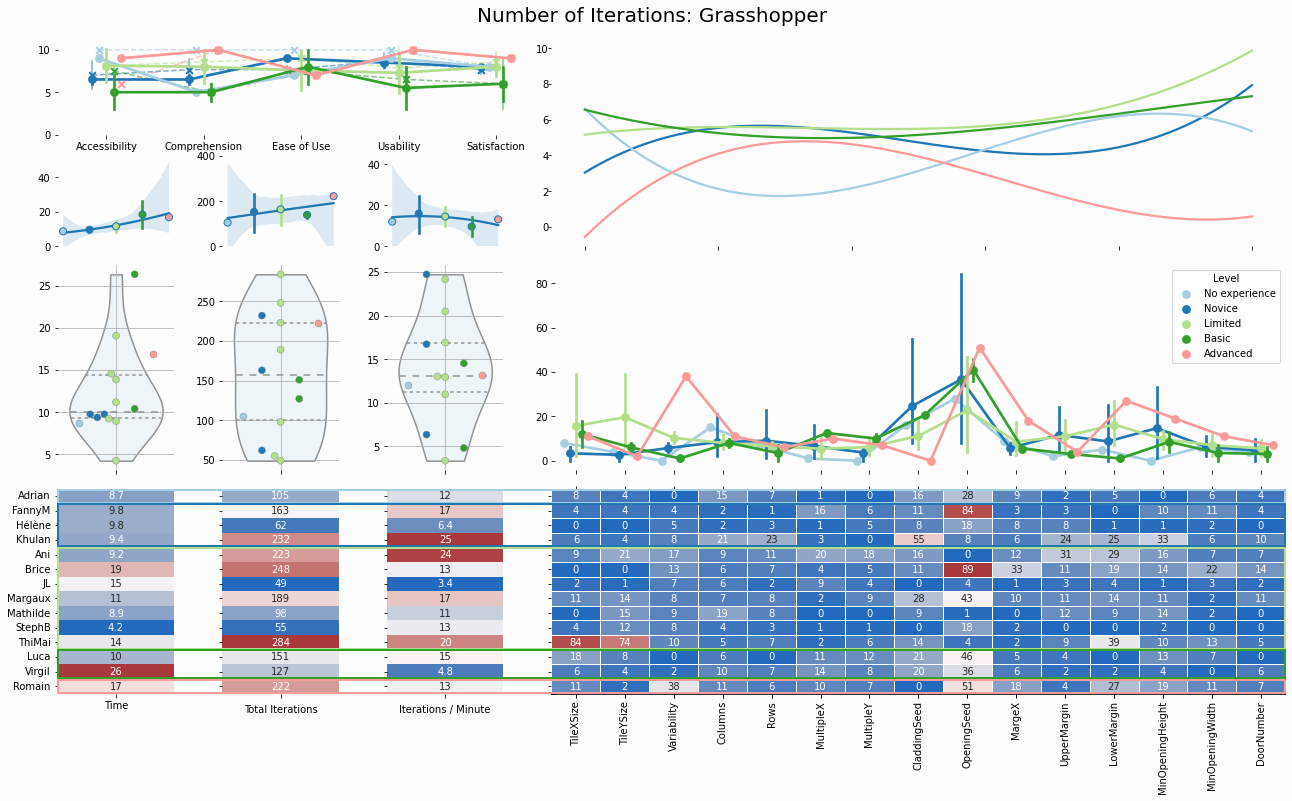

In [28]:
etudegen(0, iterations_df, time_iterations_df, studycolumns=['Time', 'Total Iterations', 'Iterations / Minute'], b=4, Title='Number of Iterations');

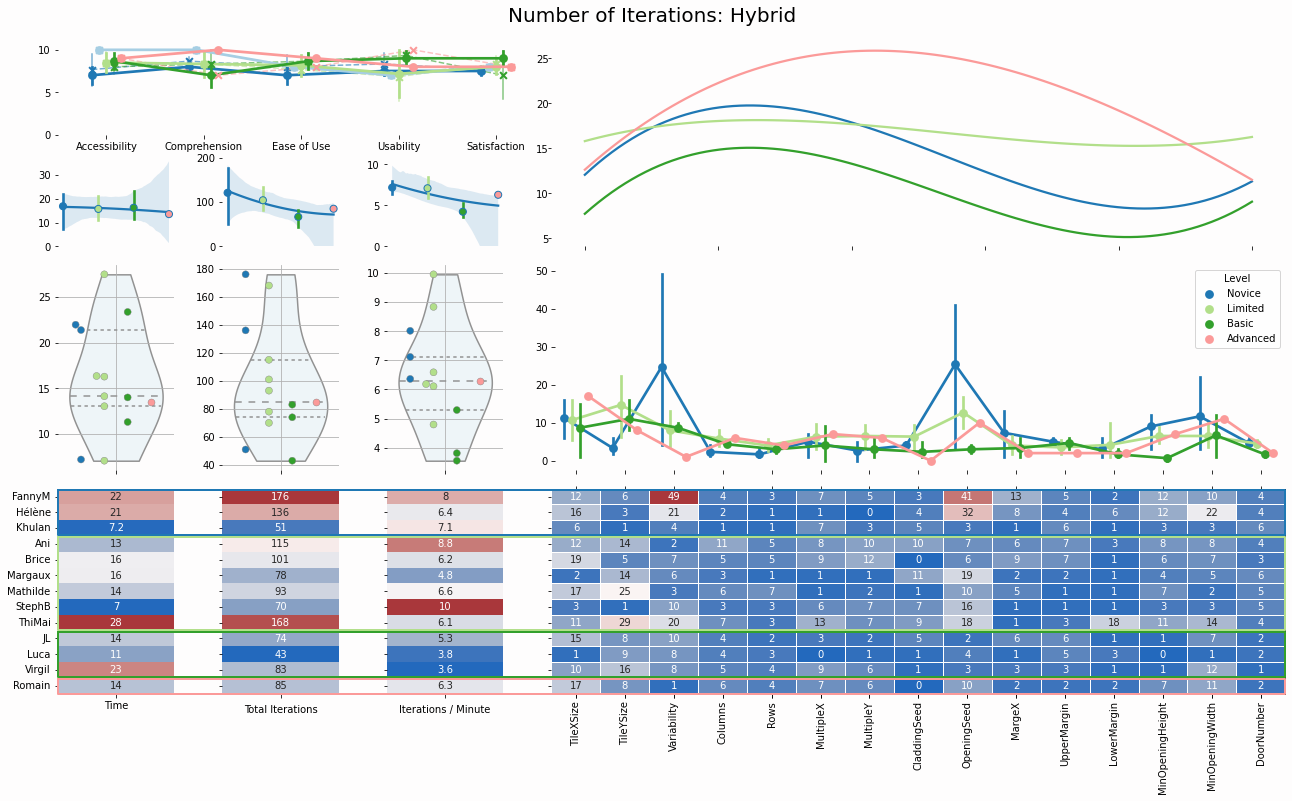

In [29]:
etudegen(1, iterations_df.drop('Adrian', axis=0, level='Name'), time_iterations_df.drop('Adrian', axis=0, level='Name'), studycolumns=['Time', 'Total Iterations', 'Iterations / Minute'], b=8, Title='Number of Iterations', y2=0.1785);

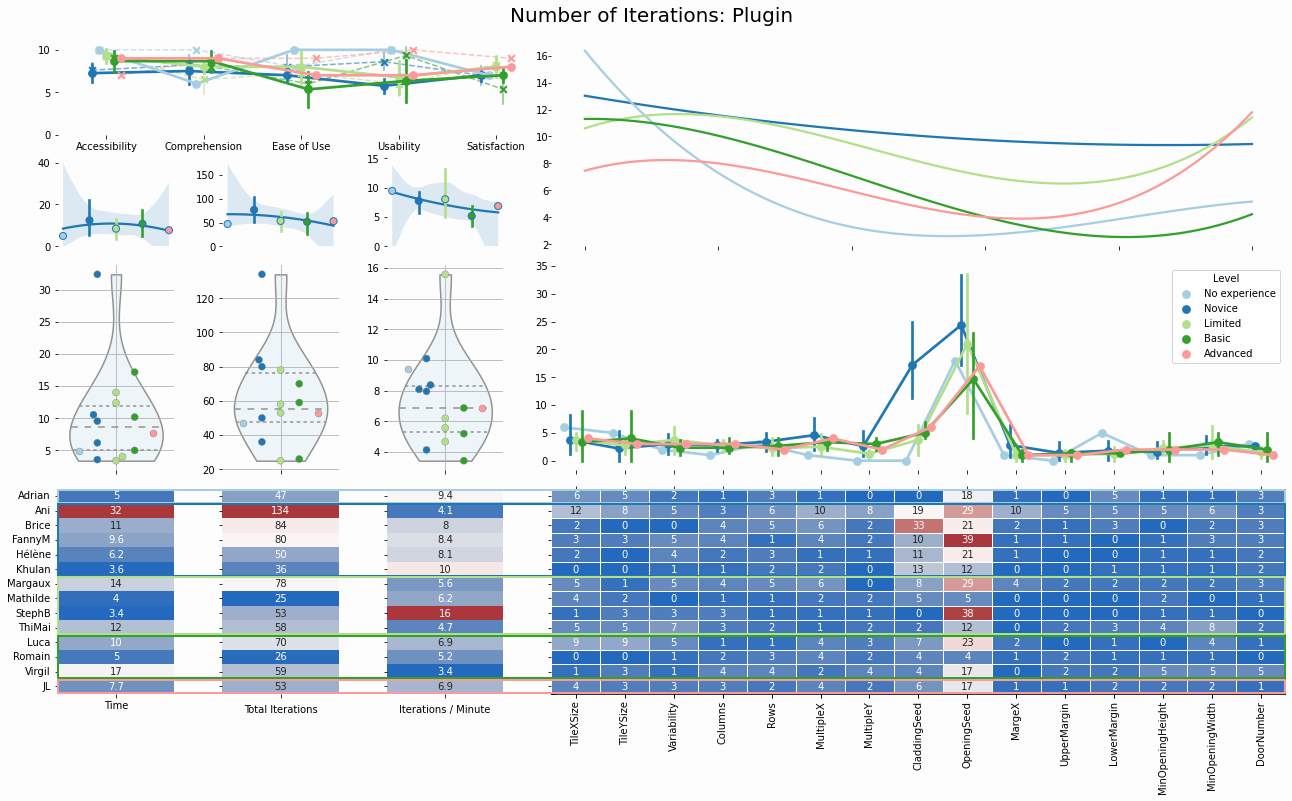

In [30]:
etudegen(2, iterations_df, time_iterations_df, studycolumns=['Time', 'Total Iterations', 'Iterations / Minute'], b=3, Title='Number of Iterations');

### Total 

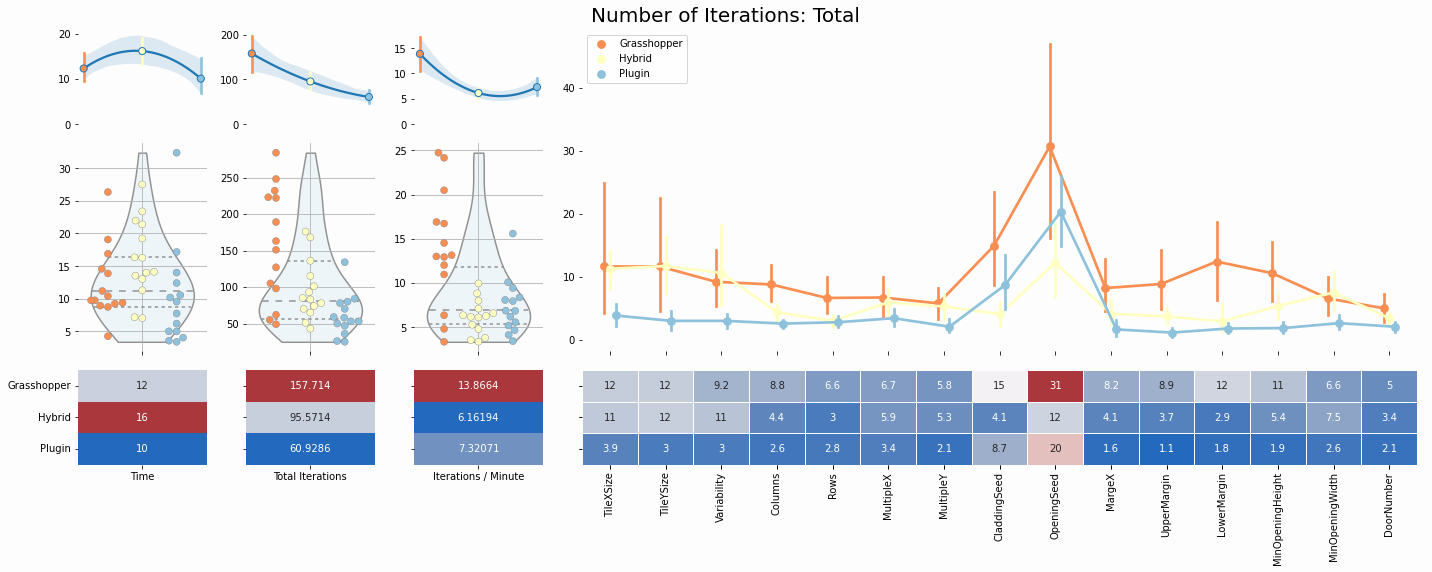

In [31]:
def Total(df1,studycolumn,_Title):
    df=df1.droplevel(['Order'])
    fig =plt.figure(figsize=(24,8),facecolor="#fefdfd")
    gs = GridSpec(4,40,figure=fig)
    ax1=fig.add_subplot(gs[1:3,:4])
    ax3=fig.add_subplot(gs[1:3,5:9])
    ax4=fig.add_subplot(gs[1:3,10:14])
    fig.suptitle(_Title+': Total',x=0.5,y=0.92,fontsize=20)
    ax9=fig.add_subplot(gs[3:,15:])
    ax2=fig.add_subplot(gs[:3,15:],sharex=ax9)
    ax5=fig.add_subplot(gs[3:,15:])
    ax6=fig.add_subplot(gs[3:,:4])
    ax7=fig.add_subplot(gs[3:,5:9])
    ax8=fig.add_subplot(gs[3:,10:14])
    ax10=fig.add_subplot(gs[:1,:4])
    ax11=fig.add_subplot(gs[:1,5:9])
    ax12=fig.add_subplot(gs[:1,10:14])

    a=(df.drop(['Average','Standard Deviation','Tot'],axis=0,level='Type'))
    ###Time

    # time2=df.drop(['Average','Standard Deviation','Tot'],axis=0,level='Type')
    if ('Time' in a.columns):a['Time']=a['Time'].apply(timetosec)
    b=a
    c=a
    d=a
    a=a.droplevel(['Level'])
    df=df.droplevel(['Level'])
    _color3=sns.mpl_palette("RdYlBu",3)
    ghtime=a[studycolumn[0]].xs('Grasshopper',level='Type').mean()
    hybridtime=a[studycolumn[0]].xs('Hybrid',level='Type').mean()
    plugintime=a[studycolumn[0]].xs('Plugin',level='Type').mean()
    av_time=pd.DataFrame([ghtime,hybridtime,plugintime],index=['Grasshopper','Hybrid','Plugin'],columns=[studycolumn[0]])
    sns.heatmap(av_time,ax=ax6,cbar=None,annot=True,cmap="vlag")
    ax6.set_yticklabels(['Grasshopper','Hybrid','Plugin'])
    
    tripleplot(a, studycolumn[0], ax10, ax1,'Time in minutes', _color3,'Type', (lambda x:_type.index(x)))
    tripleplot(a, studycolumn[1], ax11, ax3,'Tot Iterations', _color3,'Type', (lambda x:_type.index(x)))
    tripleplot(a, studycolumn[2], ax12, ax4,'Iterations/min', _color3,'Type', (lambda x:_type.index(x)))

    ghtime=a[studycolumn[1]].xs('Grasshopper',level='Type').mean()
    hybridtime=a[studycolumn[1]].xs('Hybrid',level='Type').mean()
    plugintime=a[studycolumn[1]].xs('Plugin',level='Type').mean()
    av_time=pd.DataFrame([ghtime,hybridtime,plugintime],index=['Grasshopper','Hybrid','Plugin'],columns=[studycolumn[1]])
    sns.heatmap(av_time,ax=ax7,cbar=None,annot=True,cmap="vlag",fmt='g')
    ax7.set_yticklabels("")
    

    ###It/minute

    ghtime=a[studycolumn[2]].xs('Grasshopper',level='Type').mean()
    hybridtime=a[studycolumn[2]].xs('Hybrid',level='Type').mean()
    plugintime=a[studycolumn[2]].xs('Plugin',level='Type').mean()
    av_time=pd.DataFrame([ghtime,hybridtime,plugintime],index=['Grasshopper','Hybrid','Plugin'],columns=[studycolumn[2]])
    sns.heatmap(av_time,ax=ax8,cbar=None,annot=True,cmap="vlag",fmt='g')
    ax8.set_yticklabels("")
    

    ###
    av_gh=df.xs('Grasshopper',level='Type').drop(studycolumn,axis=1).mean()
    av_gh.name='GH'
    av_hyb=df.xs('Hybrid',level='Type').drop(studycolumn,axis=1).mean()
    av_hyb.name='Hybrid'
    av_plugin=df.xs('Plugin',level='Type').drop(studycolumn,axis=1).mean()
    av_plugin.name='Plugin'
    average=pd.DataFrame([av_gh,av_hyb,av_plugin],index=['GH','Hybrid','Plugin'])
    sns.heatmap(average,ax=ax9,cbar=None,annot=True,cmap="vlag",linewidth=0.5)
    sns.heatmap(average,ax=ax5,cbar=None,annot=True,cmap="vlag",linewidth=0.5)
    df=df.loc[:,['Grasshopper','Hybrid','Plugin'],:]
    locs=ax5.get_xticks()
    labels=ax5.get_xticklabels()
    gh=df.drop(studycolumn,axis=1)
    # gh=gh.droplevel(['Level'])
    gh.columns=locs
    gh=gh.reset_index(level='Type',drop=False)


    gh=gh.melt(id_vars=['Type'])
    sns.pointplot(x=gh['variable'],y=gh['value'],data=df,hue=gh['Type'],ax=ax2,palette="RdYlBu",dodge=0.2)
    # ax2.set_xticks(locs);
    ax2.set_xlabel(None)
    ax2.legend(loc='upper left')
    ax2.set_xticklabels("")
    ax2.set_frame_on(False)
    ax2.set_ylabel(None)
    # ax2.set_yticklabels("")
    ax5.set_xticklabels(labels)
    ax1.set_frame_on(False)
    ax1.grid(visible=True)
    ax3.set_frame_on(False)
    ax3.grid(visible=True)
    ax4.set_frame_on(False)
    ax4.grid(visible=True)
    ax9.set_yticklabels("")
    ax5.set_yticklabels("")
    return 1


studycolumn=['Time','Total Iterations','Iterations / Minute']
Total(iterations_df, studycolumn, 'Number of Iterations');

## Etude selon l'ordre

### Grasshopper

In [32]:
_color2=sns.mpl_palette('RdYlBu_r',3)

In [33]:
def order_analysis(a,df,timedf,kplist,b,_Title):
    fig=plt.figure(figsize=(24,12))
    Title=str(_type[a - 1])
    fig.suptitle(_Title+": "+Title,y=0.94,fontsize=20)
    gs = GridSpec(4,12,figure=fig)
    ax1=fig.add_subplot(gs[:1,3:6])
    ax2=fig.add_subplot(gs[1:2,3:6])
    ax3=fig.add_subplot(gs[2:3,3:6])
    ax4=fig.add_subplot(gs[:4,:1])
    ax5=fig.add_subplot(gs[3:4,3:6])
    ax6=fig.add_subplot(gs[:4,1:2])
    ax7=fig.add_subplot(gs[:4,2:3])
    ax8=fig.add_subplot(gs[:1,9:])
    ax9=fig.add_subplot(gs[1:2,9:])
    ax10=fig.add_subplot(gs[2:3,9:])
    ax11=fig.add_subplot(gs[3:4,9:])
    ax12=fig.add_subplot(gs[:1,6:9])
    ax13=fig.add_subplot(gs[1:2,6:9])
    ax14=fig.add_subplot(gs[2:3,6:9])
    ax15=fig.add_subplot(gs[3:4,6:9])
    label=(_type[a - 1])
    keeplist=kplist
    resultat=df.reset_index('Level',drop=False)
    resultat['Level']=resultat['Level'].map(lambda x:x[b])
    resultat.sort_values('Level',axis=0,inplace=True)
    if ('Time' in resultat.columns):resultat['Time']=resultat['Time'].apply(timetosec)
    resultat=resultat.xs(label,level='Type')
    resGh=resEnq[resEnq['Type'] == _type[a - 1]]
    resGh['Level']=resGh['Level'].map(lambda x:x[b])
    ax=[ax1,ax2,ax3,ax4,ax6,ax7,ax8,ax9,ax10]
    for i in range(3):
        InteractionLinePlot(ax[i],resultat,i,keeplist)
        bxplt(ax[i+3],i,resultat,keeplist)
        GraphEnq(ax[i+6],i,resGh)
    ax6.set_yticklabels("")
    ax7.set_yticklabels("")
    df=timedf.xs(_type[a - 1], level='Type').reset_index('Level', drop=False)
    df['Level']=df['Level'].map(lambda x:int(x[b]))
    df0level=df.xs(0,level='Order')['Level'].unique()
    df1level=df.xs(1,level='Order')['Level'].unique()
    df2level=df.xs(2,level='Order')['Level'].unique()
    dflevel=[df0level,df1level,df2level]
    df.set_index(['Level'],append=True,inplace=True)
    ax=[ax12,ax13,ax14]
    for i in range(3):
        timelevelplot(df,dflevel,i,ax[i],3)
    df=df.droplevel('Level')
    for i in range(3):
        sns.regplot(x='variable',y='value',data=df.xs(i,level='Order').melt().applymap(lambda x:int(x)),ax=ax15,order=3,x_estimator=np.mean,scatter=False,color=_color2[i],ci=None)
    t=resultat.drop(keeplist,axis=1).drop(['Level'],axis=1)
    t=t.reset_index('Order',drop=False)
    t['Order']=t['Order'].map(lambda x:x+1)
    t=t.melt(id_vars='Order')
    sns.pointplot(x=t['variable'],y=t['value'],data=t,hue=t['Order'],palette='RdYlBu_r',ax=ax5,ci='sd',dodge=0.2)
    sns.pointplot(x='variable',y='value',data=resGh[resGh['Survey']=='B'],hue='Order',ci='sd',dodge=0.15,palette='RdYlBu_r',ax=ax11);
    ax11.set_ylabel(None)
    # ax11.grid(visible=True)
    ax11.get_legend().remove()
    ax11.set_xlabel(None)
    ax11.tick_params(axis='x',rotation=20)
    ax5.legend(loc='upper right')
    ax5.tick_params(axis='y',pad=-1)
    ax5.set_xticklabels("")
    ax5.set_xlabel('Parameter');
    ax5.set_title('Average by Interaction order',loc='left',y=1,pad=3);
    return

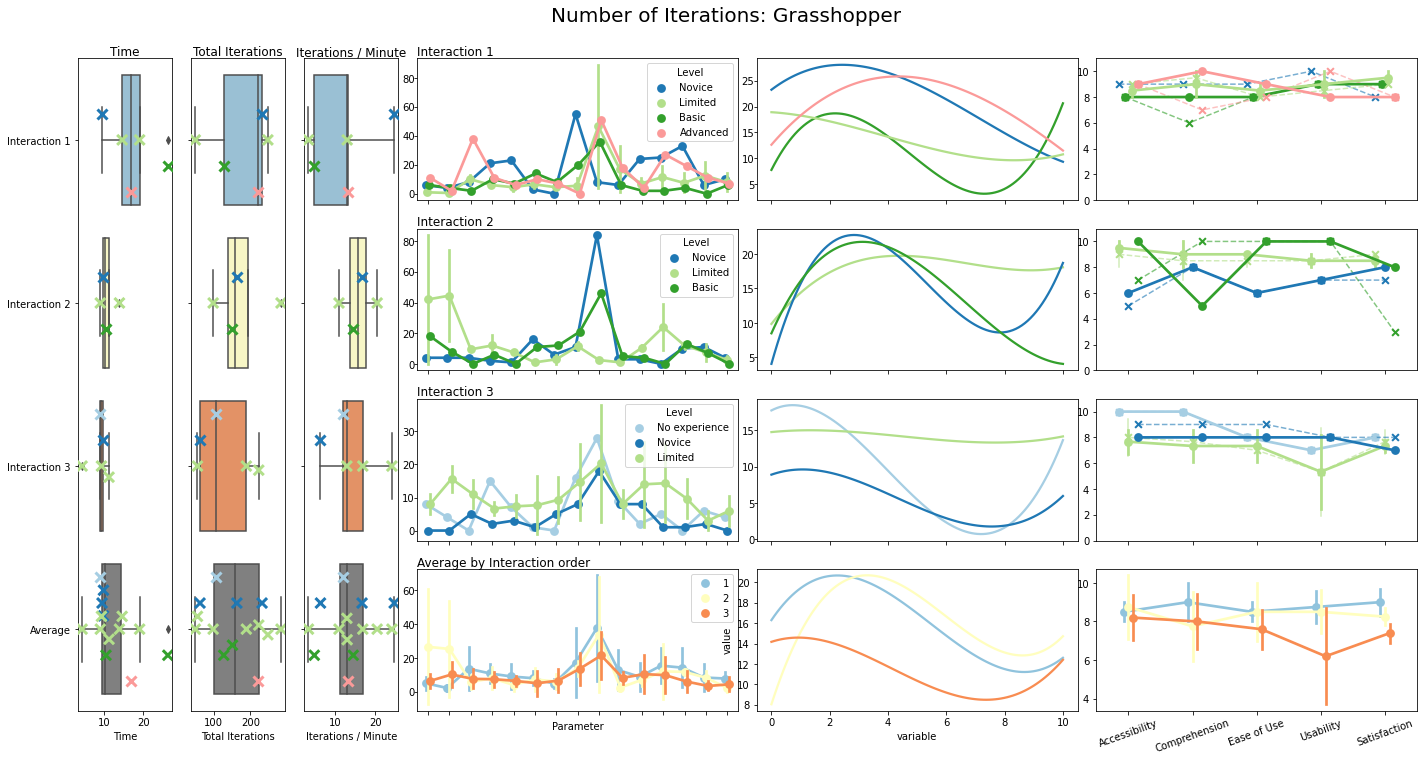

In [34]:
keeplist1 =['Time','Total Iterations','Iterations / Minute']
order_analysis(1, iterations_df, time_iterations_df, keeplist1, 4, 'Number of Iterations')

### Hybrid

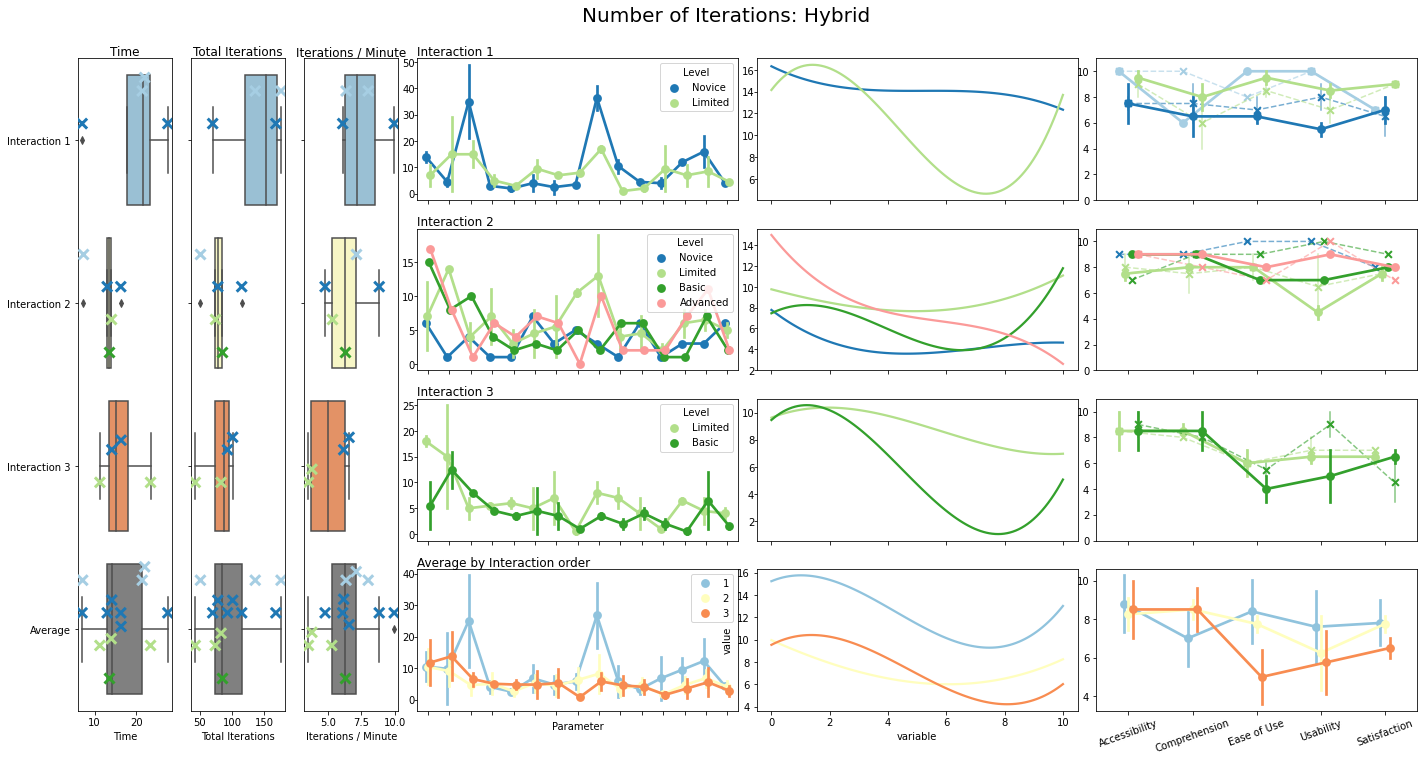

In [35]:
order_analysis(2, iterations_df.drop('Adrian', axis=0, level='Name'), time_iterations_df.drop('Adrian', axis=0, level='Name'), keeplist1, 8, 'Number of Iterations')

### Plugin

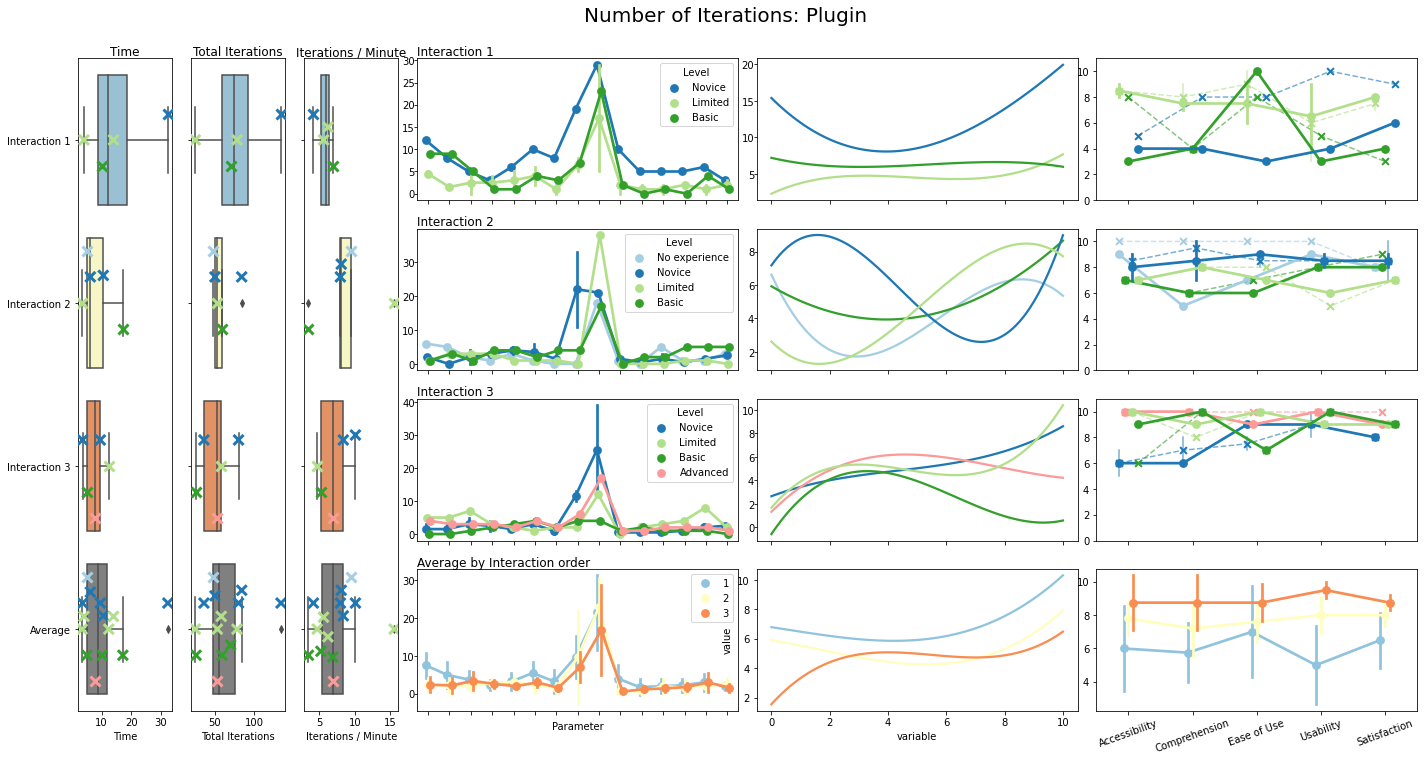

In [36]:
order_analysis(3, iterations_df, time_iterations_df, keeplist1, 3, 'Number of Iterations')

# Phases

In [37]:
#Iterations.round(decimals=1)
#ax = plt.subplot(111, frame_on=False)
#ax.xaxis.set_visible(False)  # hide the x axis
#ax.yaxis.set_visible(False)
#ax.figure.set_figwidth(22)
#v=table(ax,Iterations,loc='top')
with pd.option_context('display.max_rows', None, 'display.max_columns', 12,'display.max_colwidth',50):
    display(phase_df.round(decimals=2))
iterations_df.round(decimals=2).to_excel('output/testexcel.xlsx')

TileXSize  TileYSize  \
Name     Level     Order Type                                       
Khulan   303112001 0     Grasshopper              2.00       1.00   
                   1     Hybrid                   4.00       1.00   
                   2     Plugin                   0.00       0.00   
                   -     Tot                      6.00       2.00   
                         Average                  2.00       0.67   
                         Standard Deviation       2.00       0.58   
Adrian   404000100 2     Grasshopper              2.00       3.00   
                   0     Hybrid                   6.00       3.00   
                   1     Plugin                   3.00       4.00   
                   -     Tot                     11.00      10.00   
                         Average                  3.67       3.33   
                         Standard Deviation       2.08       0.58   
Mathilde 404223002 1     Grasshopper              0.00       1.00   
                   2     Hybrid                   3.00       5.00   
                   0     Plugin                   3.00       1.00   
                   -     Tot                      6.00       7.00   
                         Average                  2.00       2.33   
                         Standard Deviation       1.73       2.31   
Virgil   303334003 0     Grasshopper              3.00       2.00   
                   2     Hybrid                   3.00       3.00   
                   1     Plugin                   1.00       2.00   
                   -     Tot                      7.00       7.00   
                         Average                  2.33       2.33   
                         Standard Deviation       1.15       0.58   
FannyM   404113101 1     Grasshopper              1.00       1.00   
                   0     Hybrid                   3.00       3.00   
                   2     Plugin                   2.00       3.00   
                   -     Tot                      6.00       7.00   
                         Average                  2.00       2.33   
                         Standard Deviation       1.00       1.15   
Margaux  303221202 2     Grasshopper              4.00       3.00   
                   1     Hybrid                   2.00       3.00   
                   0     Plugin                   2.00       1.00   
                   -     Tot                      8.00       7.00   
                         Average                  2.67       2.33   
                         Standard Deviation       1.15       1.15   
JL       304420003 0     Grasshopper              2.00       1.00   
                   1     Hybrid                   6.00       3.00   
                   2     Plugin                   3.00       2.00   
                   -     Tot                     11.00       6.00   
                         Average                  3.67       2.00   
                         Standard Deviation       2.08       1.00   
Hélène   404113001 2     Grasshopper              0.00       0.00   
                   0     Hybrid                   3.00       2.00   
                   1     Plugin                   1.00       0.00   
                   -     Tot                      4.00       2.00   
                         Average                  1.33       0.67   
                         Standard Deviation       1.53       1.15   
Luca     324332103 1     Grasshopper              2.00       1.00   
                   2     Hybrid                   1.00       3.00   
                   0     Plugin                   5.00       5.00   
                   -     Tot                      8.00       9.00   
                         Average                  2.67       3.00   
                         Standard Deviation       2.08       2.00   
Brice    505122002 0     Grasshopper              0.00       0.00   
                   2     Hybrid                   7.00       3.00   
                   1     Plugin            

## Étude Générale

### Grasshopper

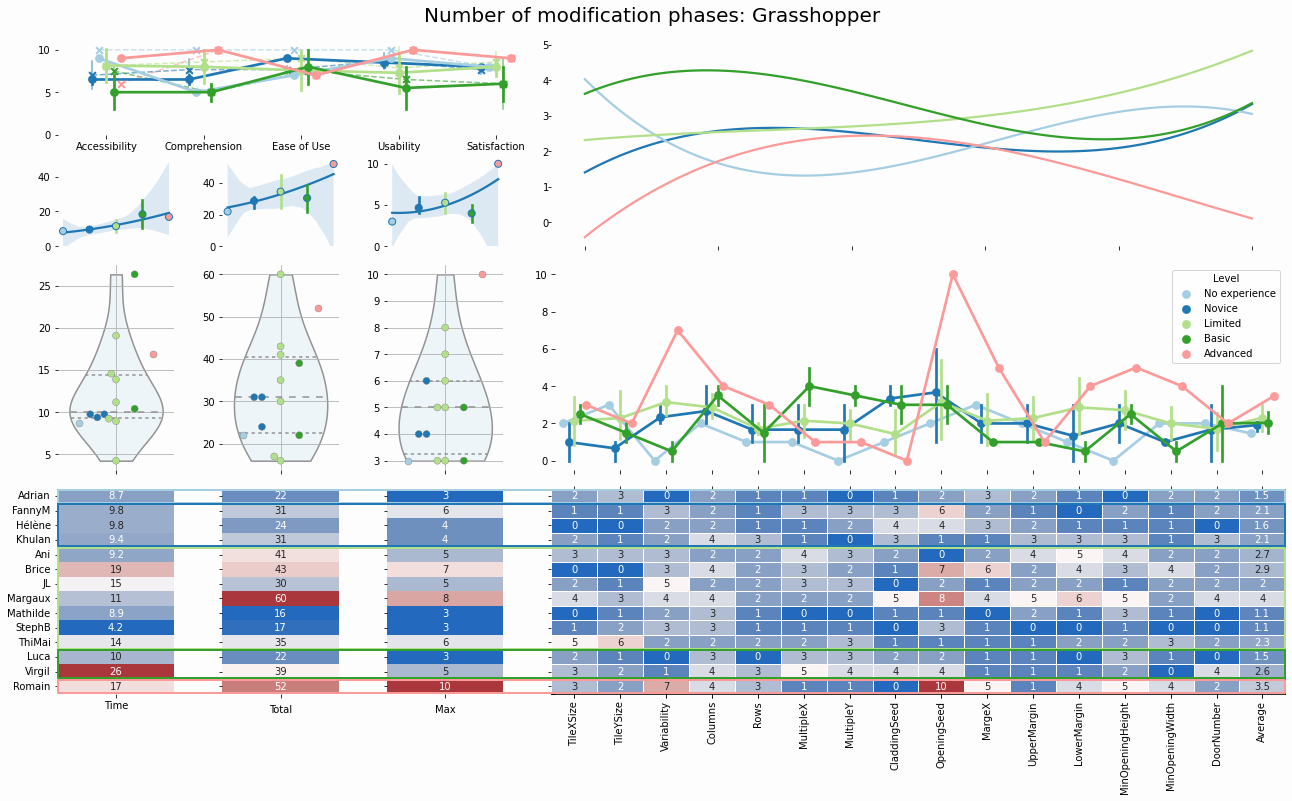

In [38]:
etudegen(0, phase_df, time_phases_df, studycolumns=['Time', 'Total', 'Max'], b=4, Title='Number of modification phases');

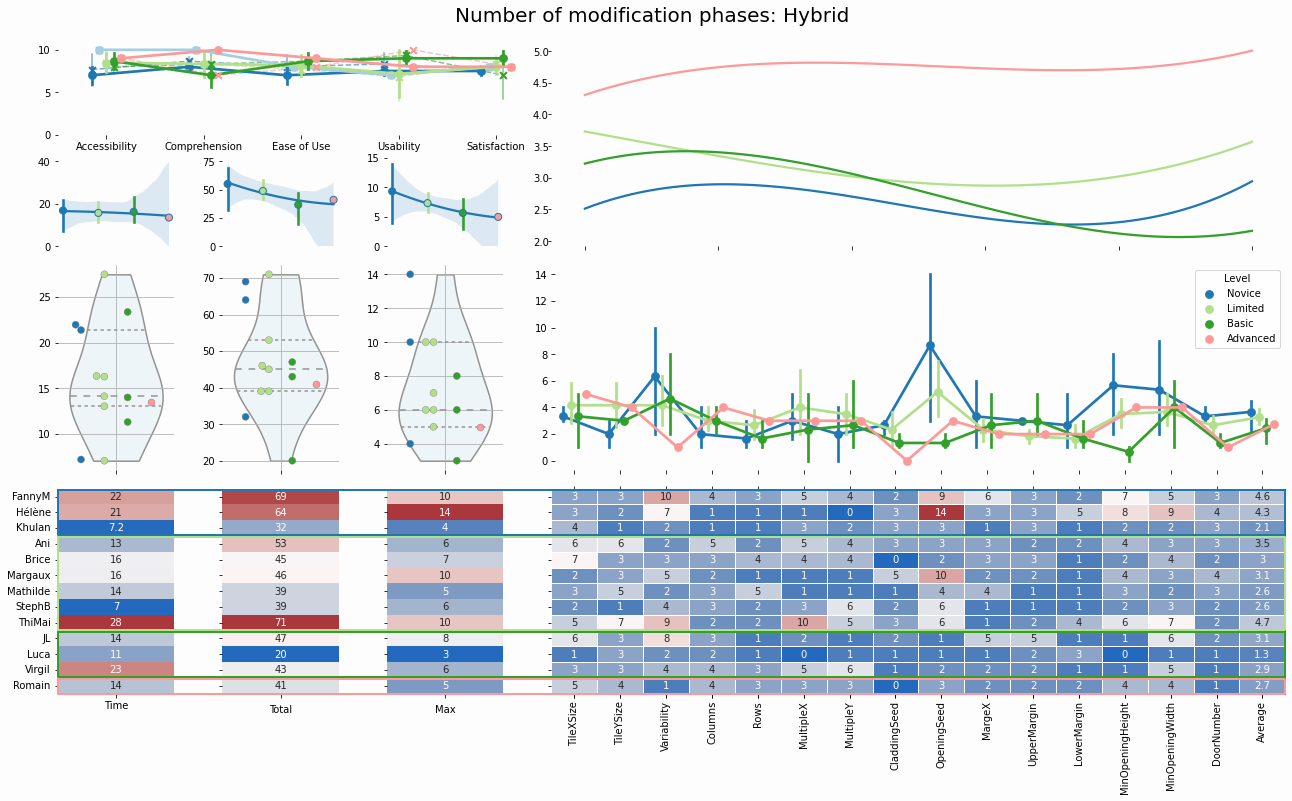

In [39]:
etudegen(1, phase_df.drop('Adrian', axis=0, level='Name'), time_phases_df.drop('Adrian', axis=0, level='Name'), studycolumns=['Time', 'Total', 'Max'], b=8, Title='Number of modification phases', y2=0.1785);

### Plugin

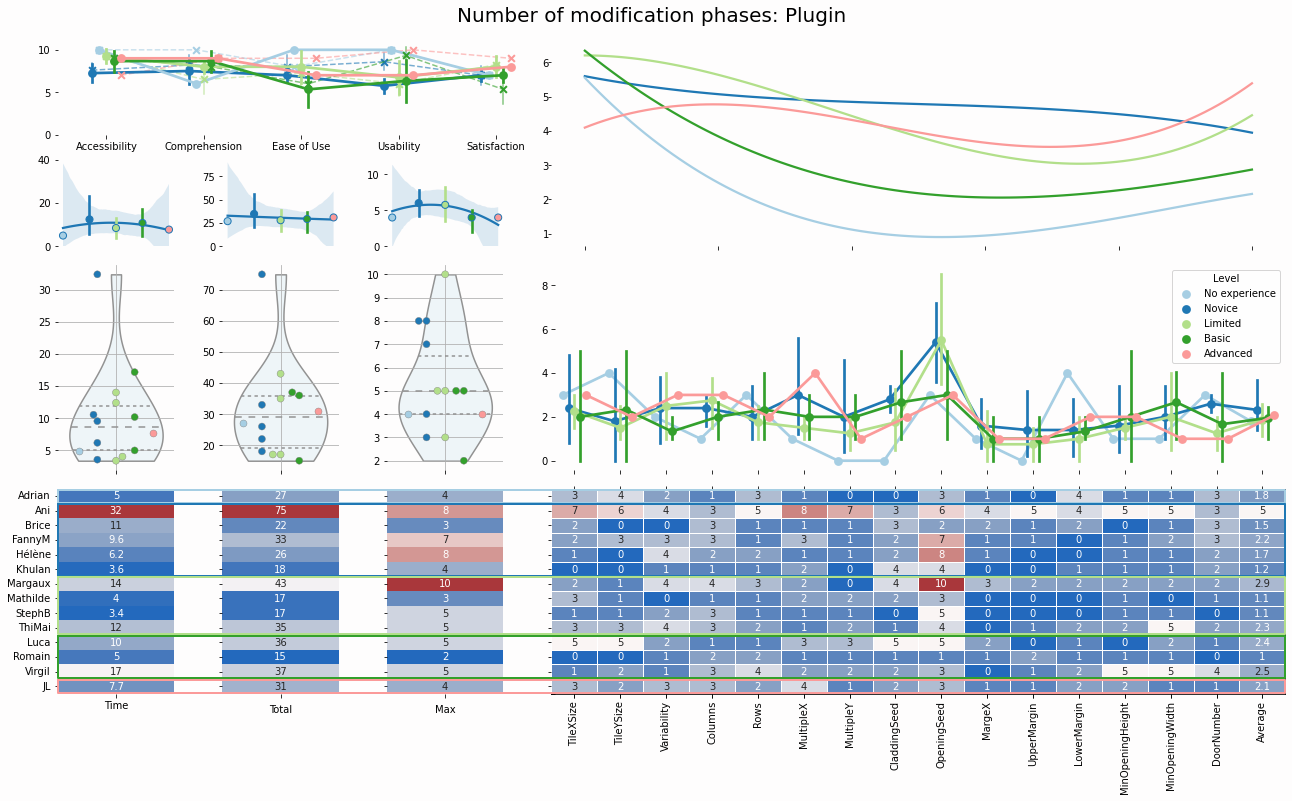

In [40]:
etudegen(2, phase_df, time_phases_df, studycolumns=['Time', 'Total', 'Max'], b=3, Title='Number of modification phases');

### Total 

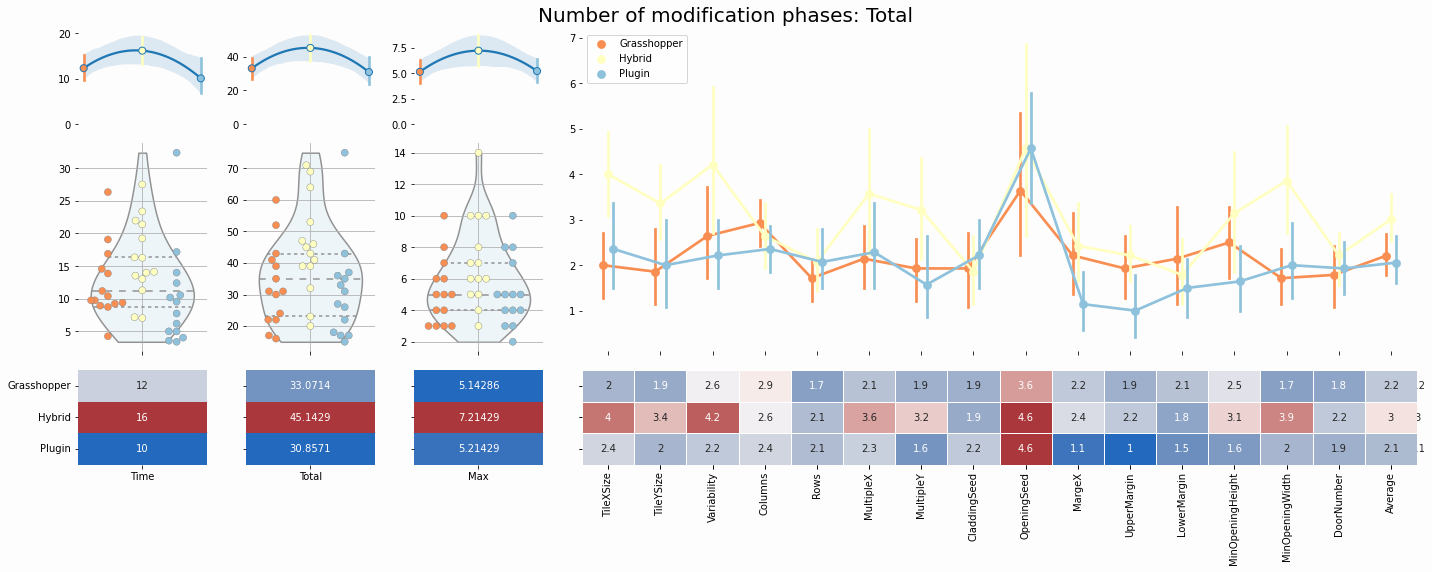

In [41]:
Total(phase_df, ['Time', 'Total', 'Max'], 'Number of modification phases');

## Etude selon l'ordre

### Grasshopper

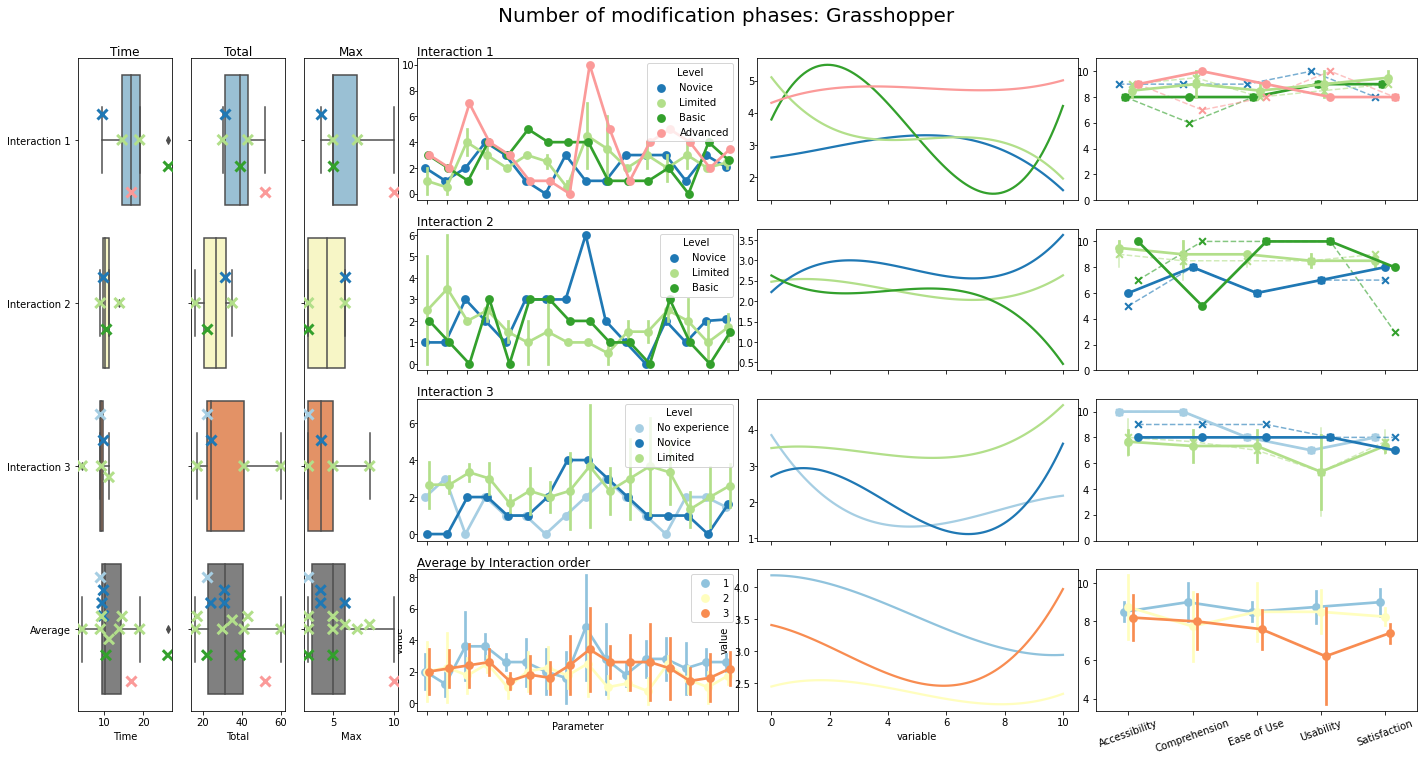

In [42]:
keeplist2 =['Time','Total','Max']
order_analysis(1, phase_df, time_phases_df, keeplist2, 4, 'Number of modification phases')

### Hybrid

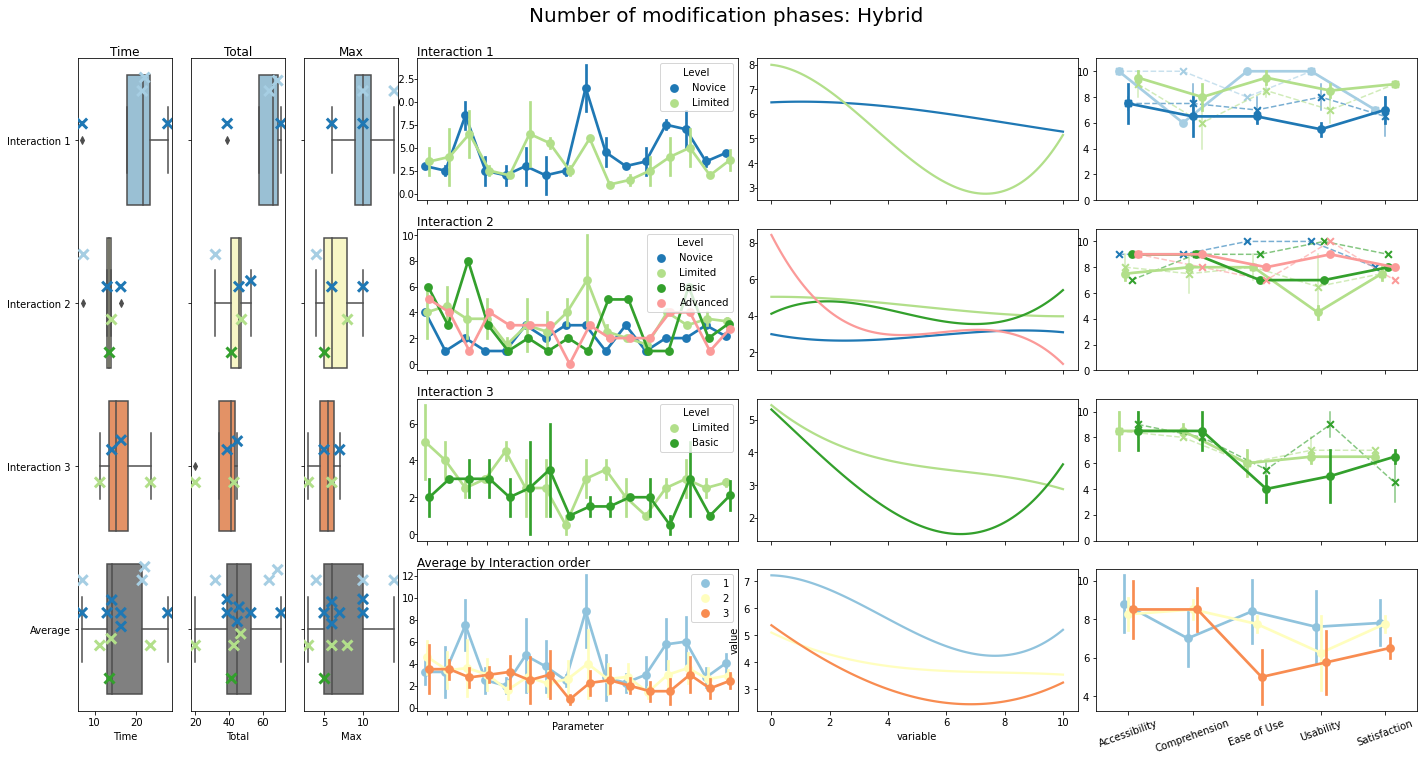

In [43]:
order_analysis(2, phase_df.drop('Adrian', axis=0, level='Name'), time_phases_df.drop('Adrian', axis=0, level='Name'), keeplist2, 8, 'Number of modification phases')

### Plugin

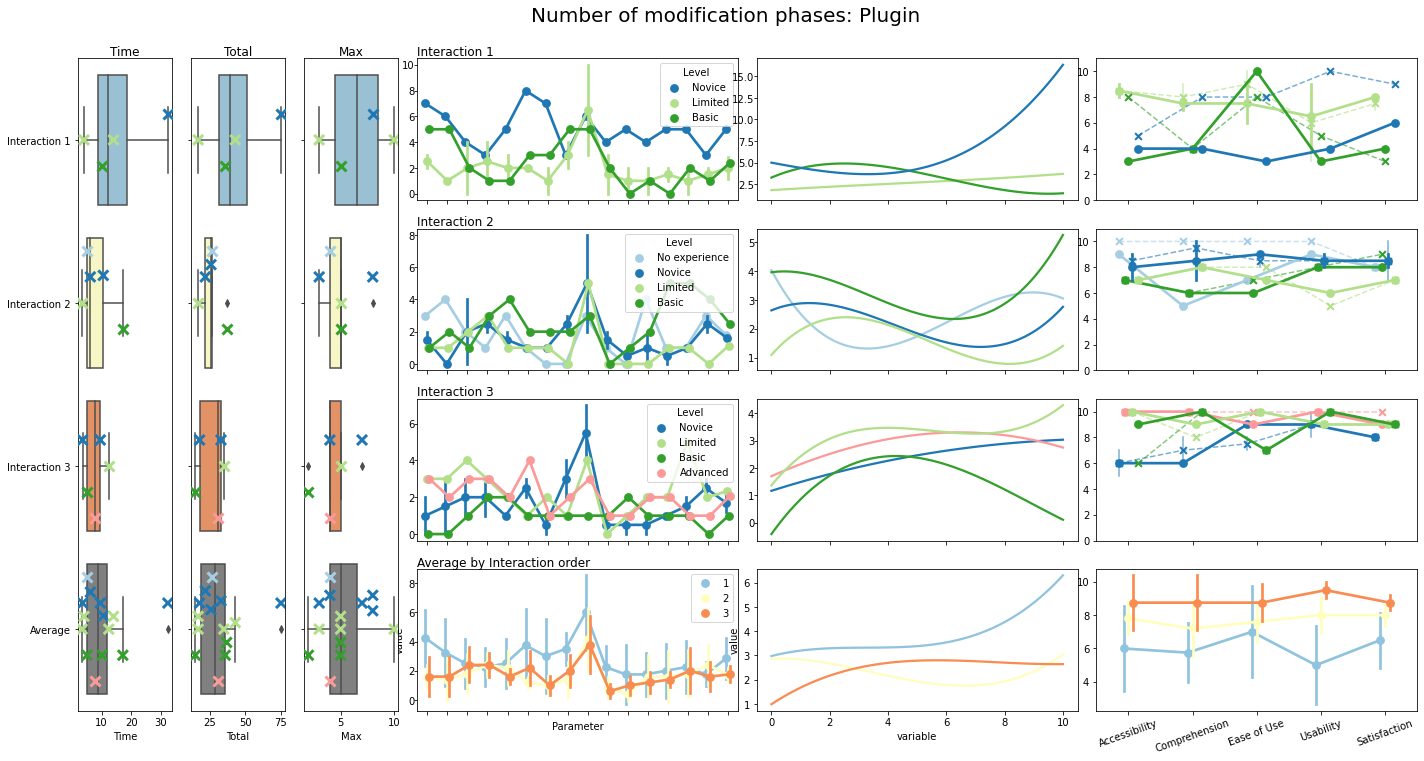

In [44]:
order_analysis(3, phase_df, time_phases_df, keeplist2, 3, 'Number of modification phases')

# Unique

In [45]:
#Iterations.round(decimals=1)
#ax = plt.subplot(111, frame_on=False)
#ax.xaxis.set_visible(False)  # hide the x axis
#ax.yaxis.set_visible(False)
#ax.figure.set_figwidth(22)
#v=table(ax,Iterations,loc='top')
with pd.option_context('display.max_rows', None, 'display.max_columns', 12,'display.max_colwidth',50):
    display(unique_df.round(decimals=2))
unique_df.round(decimals=2).to_excel('output/testexcel-unique.xlsx')

TileXSize  TileYSize  \
Name     Level     Order Type                                       
Adrian   404000100 2     Grasshopper              8.00       5.00   
                   0     Hybrid                  16.00      18.00   
                   1     Plugin                   4.00       6.00   
                   -     Tot                     28.00      29.00   
                         Average                  9.33       9.67   
                         Standard Deviation       6.11       7.23   
Mathilde 404223002 1     Grasshopper              1.00      15.00   
                   2     Hybrid                  16.00      25.00   
                   0     Plugin                   5.00       3.00   
                   -     Tot                     22.00      43.00   
                         Average                  7.33      14.33   
                         Standard Deviation       7.77      11.02   
Virgil   303334003 0     Grasshopper              6.00       4.00   
                   2     Hybrid                  10.00      13.00   
                   1     Plugin                   2.00       4.00   
                   -     Tot                     18.00      21.00   
                         Average                  6.00       7.00   
                         Standard Deviation       4.00       5.20   
FannyM   404113101 1     Grasshopper              5.00       5.00   
                   0     Hybrid                  12.00       6.00   
                   2     Plugin                   4.00       3.00   
                   -     Tot                     21.00      14.00   
                         Average                  7.00       4.67   
                         Standard Deviation       4.36       1.53   
Margaux  303221202 2     Grasshopper             11.00      15.00   
                   1     Hybrid                   3.00      13.00   
                   0     Plugin                   6.00       2.00   
                   -     Tot                     20.00      30.00   
                         Average                  6.67      10.00   
                         Standard Deviation       4.04       7.00   
JL       304420003 0     Grasshopper              3.00       2.00   
                   1     Hybrid                  12.00       8.00   
                   2     Plugin                   4.00       4.00   
                   -     Tot                     19.00      14.00   
                         Average                  6.33       4.67   
                         Standard Deviation       4.93       3.06   
Hélène   404113001 2     Grasshopper              1.00       1.00   
                   0     Hybrid                  13.00       2.00   
                   1     Plugin                   2.00       1.00   
                   -     Tot                     16.00       4.00   
                         Average                  5.33       1.33   
                         Standard Deviation       6.66       0.58   
Luca     324332103 1     Grasshopper             19.00       9.00   
                   2     Hybrid                   2.00       9.00   
                   0     Plugin                   6.00       9.00   
                   -     Tot                     27.00      27.00   
                         Average                  9.00       9.00   
                         Standard Deviation       8.89       0.00   
Brice    505122002 0     Grasshopper              1.00       1.00   
                   2     Hybrid                  17.00       5.00   
                   1     Plugin                   3.00       1.00   
                   -     Tot                     21.00       7.00   
                         Average                  7.00       2.33   
                         Standard Deviation       8.72       2.31   
ThiMai   304223302 1     Grasshopper             70.00      73.00   
                   0     Hybrid                  10.00      27.00   
                   2     Plugin            

## Étude Générale

### Grasshopper

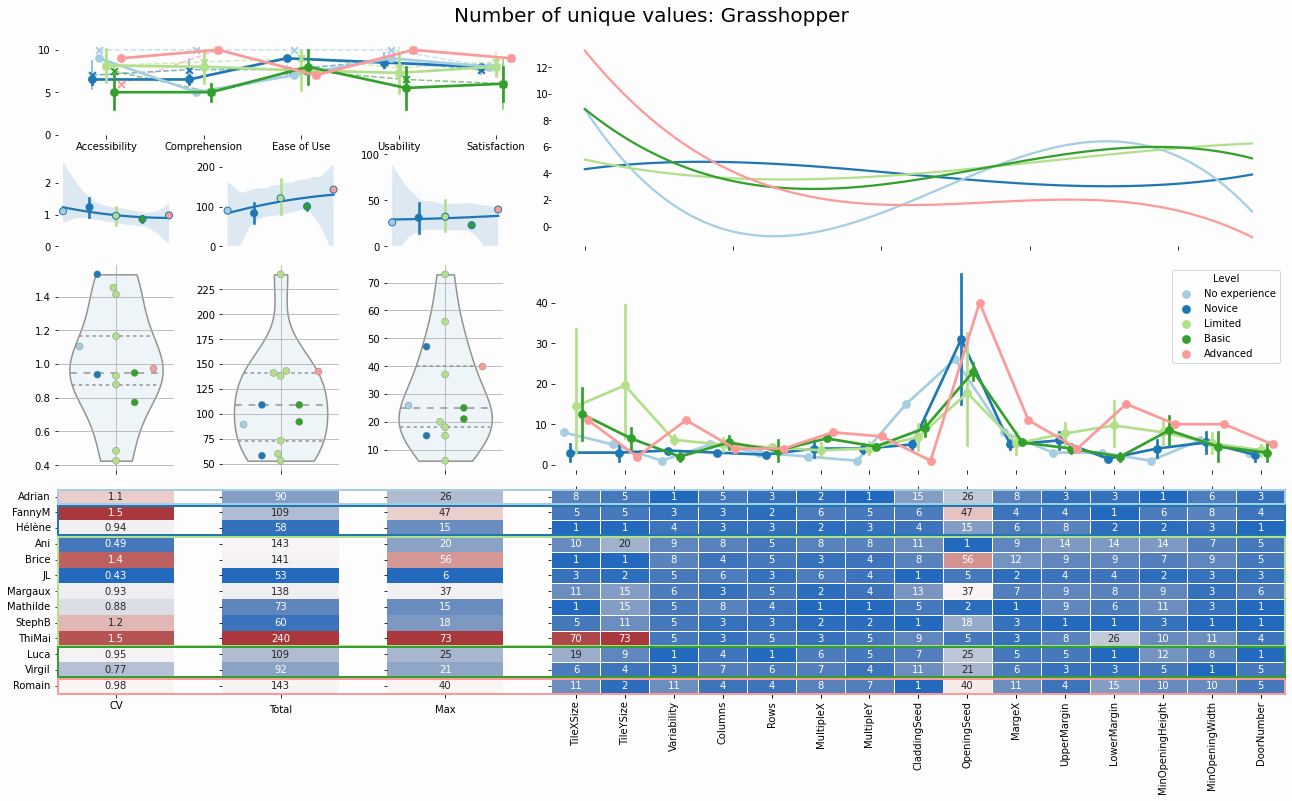

In [46]:
etudegen(0, unique_df, time_unique_df, studycolumns=['CV', 'Total', 'Max'], b=4, Title='Number of unique values', y2=0.1785);

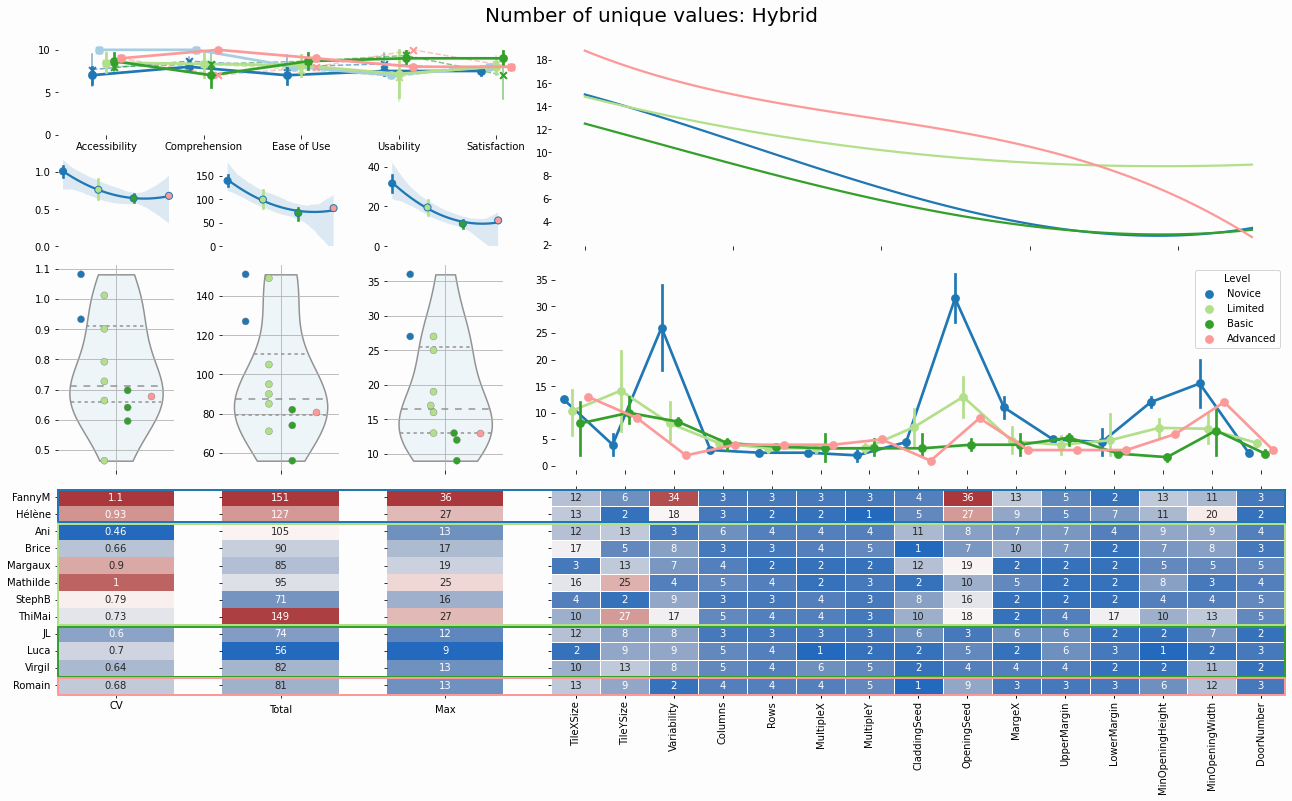

In [47]:
etudegen(1, unique_df.drop('Adrian', axis=0, level='Name'), time_unique_df.drop('Adrian', axis=0, level='Name'), studycolumns=['CV', 'Total', 'Max'], b=8, Title='Number of unique values', y2=0.1825);

### Plugin

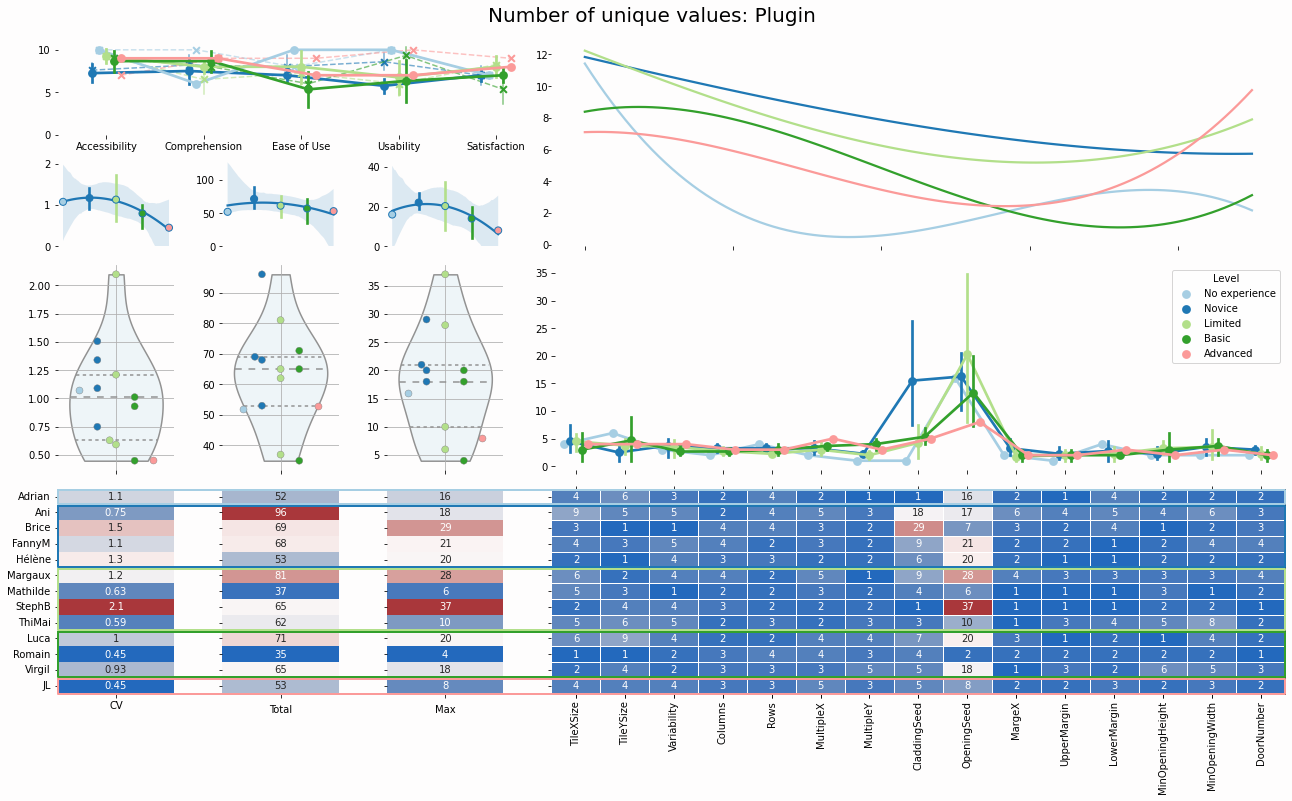

In [48]:
etudegen(2, unique_df, time_unique_df, studycolumns=['CV', 'Total', 'Max'], b=3, Title='Number of unique values', y2=0.1785);

### Total 

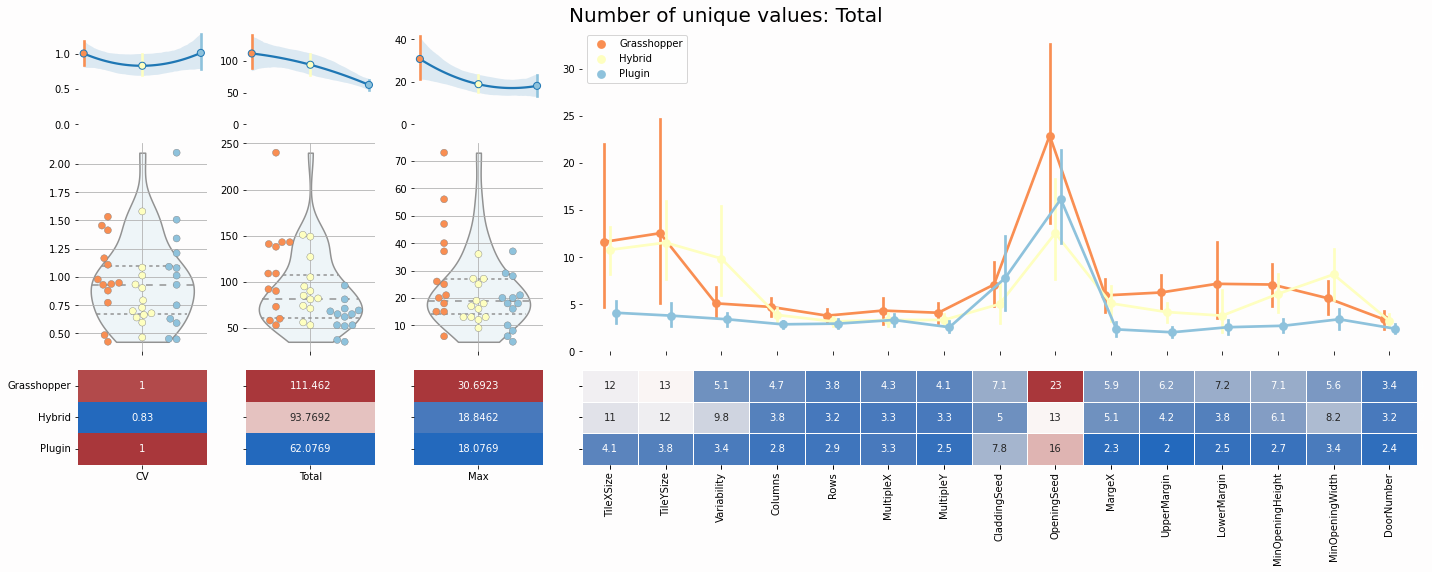

In [49]:
Total(unique_df, ['CV', 'Total', 'Max'], 'Number of unique values');

## Etude selon l'ordre

### Grasshopper

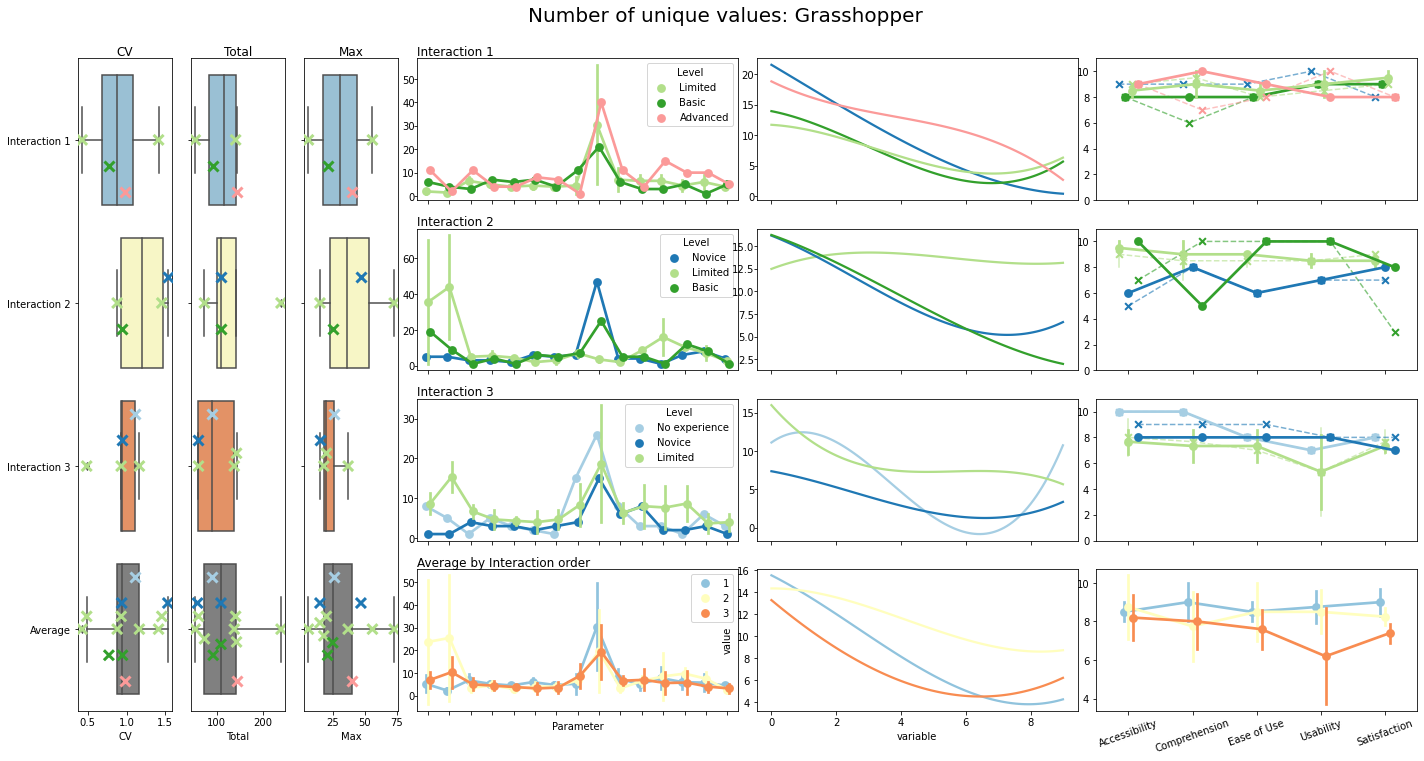

In [50]:
keeplist3 =['CV','Total','Max']
order_analysis(1, unique_df, time_unique_df, keeplist3, 4, 'Number of unique values')

### Hybrid

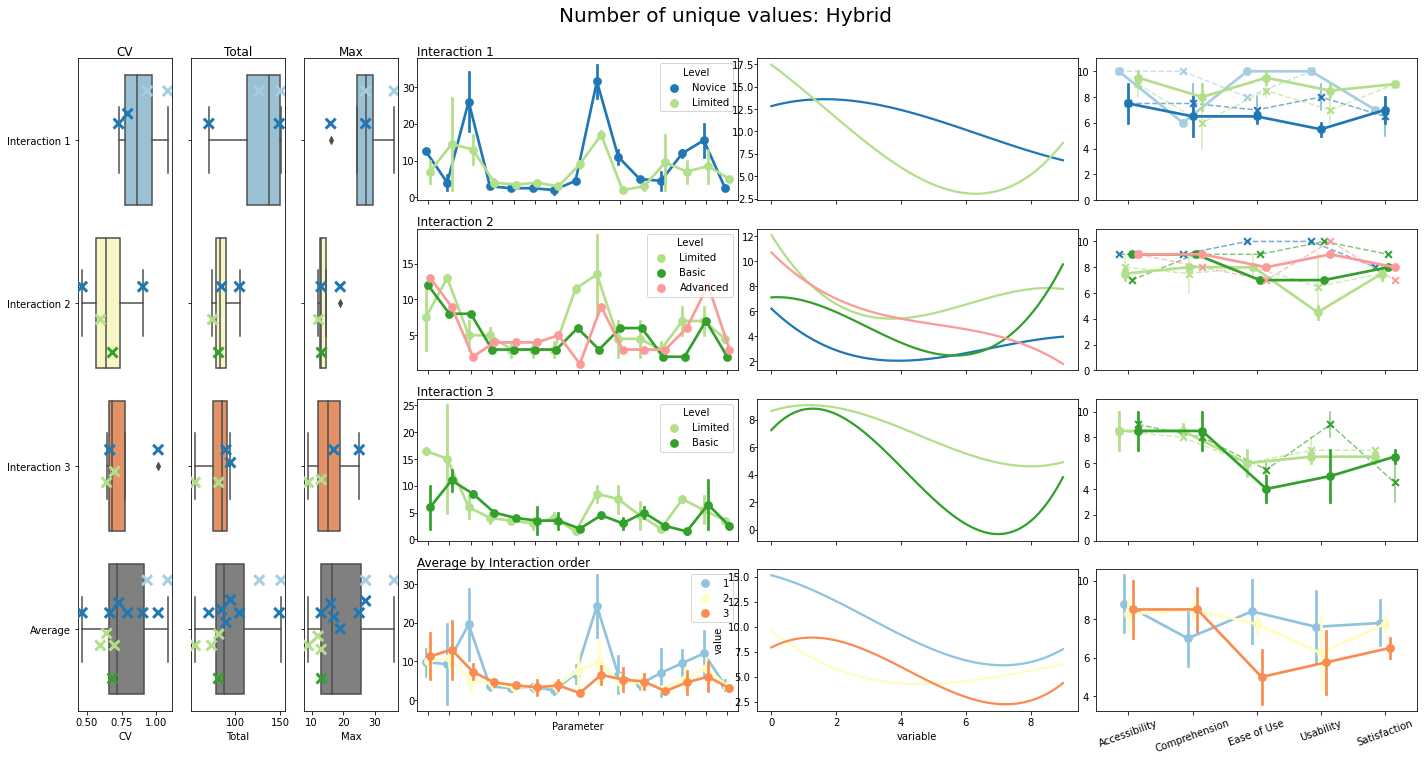

In [51]:
order_analysis(2, unique_df.drop('Adrian', axis=0, level='Name'), time_unique_df.drop('Adrian', axis=0, level='Name'), keeplist3, 8, 'Number of unique values')

### Plugin

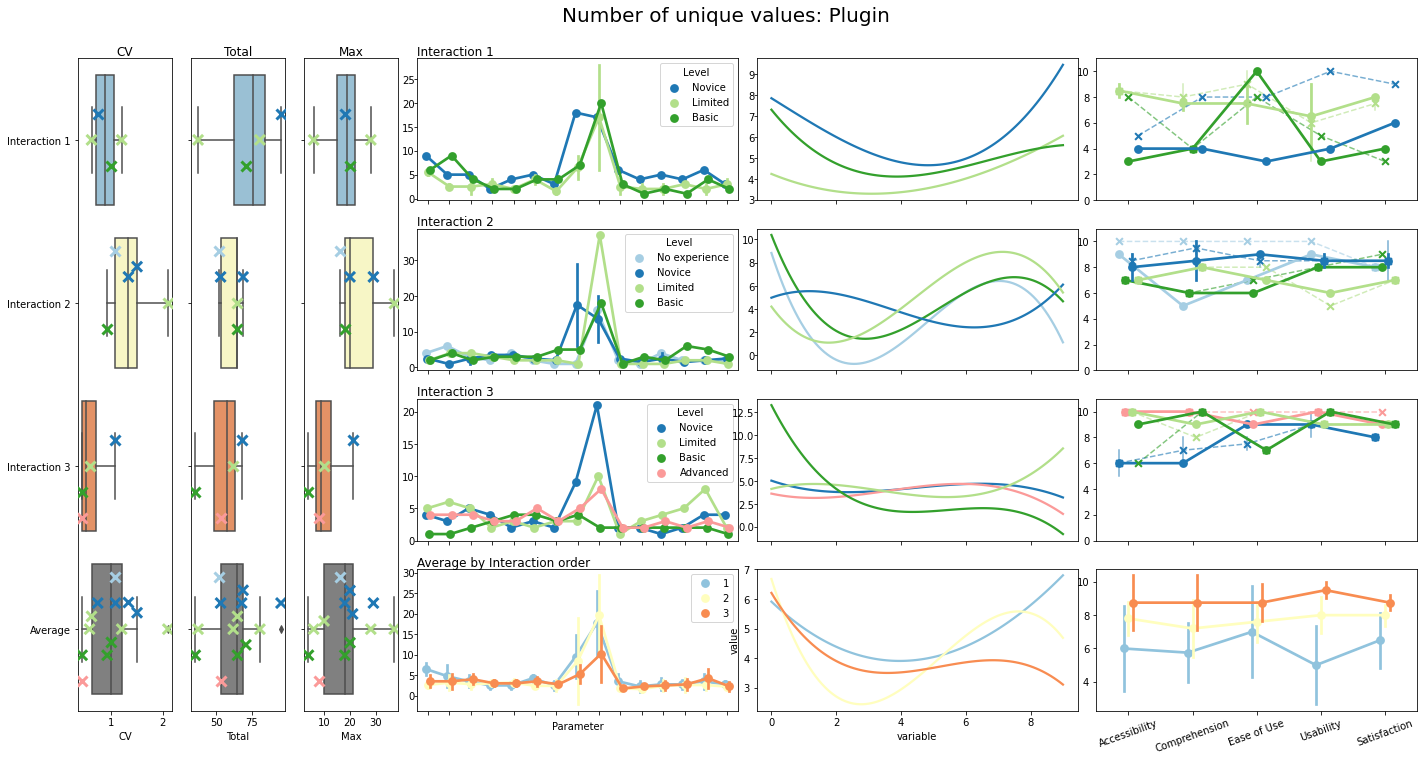

In [52]:
order_analysis(3, unique_df, time_unique_df, keeplist3, 3, 'Number of unique values')

In [53]:
phase_df.round(decimals=2)

TileXSize  TileYSize  Variability  \
Name   Level     Order Type                                                    
Khulan 303112001 0     Grasshopper              2.00       1.00         2.00   
                 1     Hybrid                   4.00       1.00         2.00   
                 2     Plugin                   0.00       0.00         1.00   
                 -     Tot                      6.00       2.00         5.00   
                       Average                  2.00       0.67         1.67   
...                                              ...        ...          ...   
StephB 404223002 0     Hybrid                   2.00       1.00         4.00   
                 1     Plugin                   1.00       1.00         2.00   
                 -     Tot                      4.00       4.00         9.00   
                       Average                  1.33       1.33         3.00   
                       Standard Deviation       0.58       0.58         1.00   

                                           Columns  Rows  MultipleX  \
Name   Level     Order Type                                           
Khulan 303112001 0     Grasshopper             4.0  3.00       1.00   
                 1     Hybrid                  1.0  1.00       3.00   
                 2     Plugin                  1.0  1.00       2.00   
                 -     Tot                     6.0  5.00       6.00   
                       Average                 2.0  1.67       2.00   
...                                            ...   ...        ...   
StephB 404223002 0     Hybrid                  3.0  2.00       3.00   
                 1     Plugin                  3.0  1.00       1.00   
                 -     Tot                     9.0  4.00       5.00   
                       Average                 3.0  1.33       1.67   
                       Standard Deviation      0.0  0.58       1.15   

                                           MultipleY  CladdingSeed  \
Name   Level     Order Type                                          
Khulan 303112001 0     Grasshopper              0.00          3.00   
                 1     Hybrid                   2.00          3.00   
                 2     Plugin                   0.00          4.00   
                 -     Tot                      2.00         10.00   
                       Average                  0.67          3.33   
...                                              ...           ...   
StephB 404223002 0     Hybrid                   6.00          2.00   
                 1     Plugin                   1.00          0.00   
                 -     Tot                      8.00          2.00   
                       Average                  2.67          0.67   
                       Standard Deviation       2.89          1.15   

                                           OpeningSeed  MargeX  UpperMargin  \
Name   Level     Order Type                                                   
Khulan 303112001 0     Grasshopper                1.00    1.00         3.00   
                 1     Hybrid                     3.00    1.00         3.00   
                 2     Plugin                     4.00    0.00         0.00   
                 -     Tot                        8.00    2.00         6.00   
                       Average                    2.67    0.67         2.00   
...                                                ...     ...          ...   
StephB 404223002 0     Hybrid                     6.00    1.00         1.00   
                 1     Plugin                     5.00    0.00         0.00   
                 -     Tot                       14.00    2.00         1.00   
                       Average                    4.67    0.67         0.33   
                       Standard Deviation         1.53    0.58         0.58   

                                           LowerMargin  MinOpeningHeight  \
Name   Level     Order Type                                    

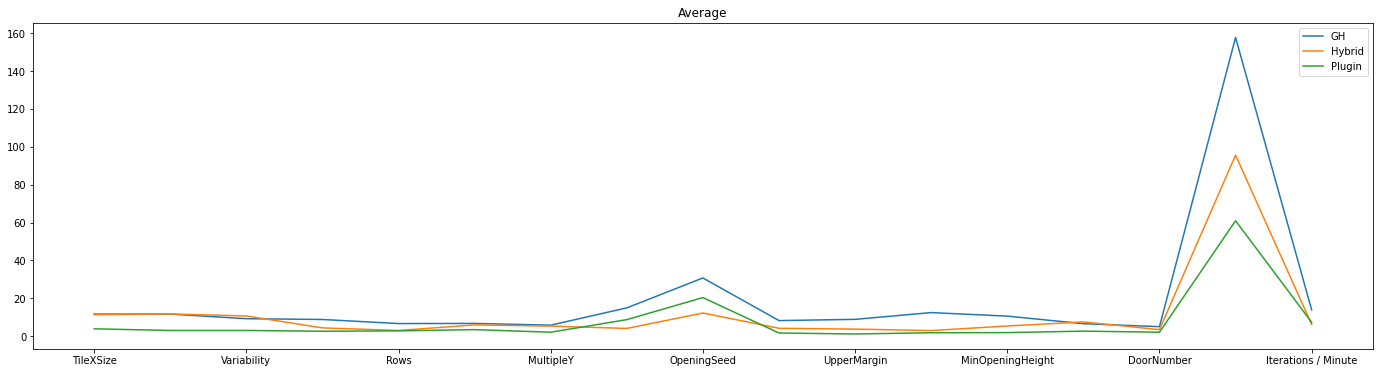

In [54]:
Iterations2=iterations_df.drop(['Time'], axis=1)
meangh=pd.DataFrame(Iterations2.xs("Grasshopper",level="Type").mean()).T
meangh.index=['GH']
mean=meangh
meanhyb=pd.DataFrame(Iterations2.xs("Hybrid",level="Type").mean()).T
meanhyb.index=['Hybrid']
mean=mean.append(meanhyb)
meanplg=pd.DataFrame(Iterations2.xs("Plugin",level="Type").mean()).T
meanplg.index=['Plugin']
mean=mean.append(meanplg)
mean = mean.round(decimals=2)
mean.T.plot(figsize=(24,6),title='Average');

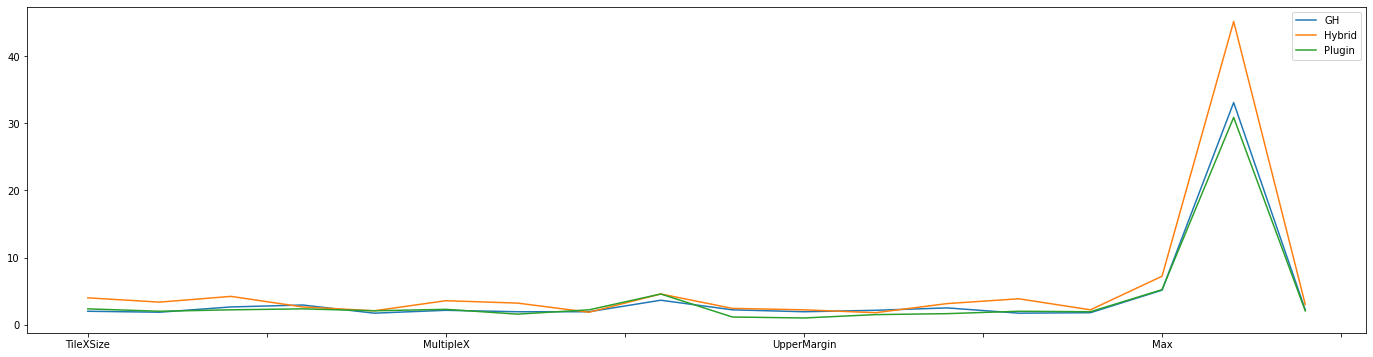

In [55]:
Phases2=phase_df.drop(['Time'], axis=1)
meangh=pd.DataFrame(Phases2.xs("Grasshopper",level="Type").mean()).T
meangh.index=['GH']
mean=meangh
meanhyb=pd.DataFrame(Phases2.xs("Hybrid",level="Type").mean()).T
meanhyb.index=['Hybrid']
mean=mean.append(meanhyb)
meanplg=pd.DataFrame(Phases2.xs("Plugin",level="Type").mean()).T
meanplg.index=['Plugin']
mean=mean.append(meanplg)
mean.T.plot(figsize=(24,6))
mean.round(decimals=2);